In [1]:
library(Seurat)
library(SeuratData)
library(SeuratWrappers)
library(ggplot2)
library(patchwork)
library(dplyr)
library(qs)
library(glue)
library(tidyverse)
library(ggpubr)
library(cowplot)
library("speckle")
library(RColorBrewer)
library(svs)
library(viridis)
library("readxl")
library(ggsignif)
library(lme4)
library(lmerTest)
library(tibble)
library(grDevices)

options(future.globals.maxSize = 3e+010)
options(Seurat.object.assay.version = "v5")

Loading required package: SeuratObject

Loading required package: sp


Attaching package: ‘SeuratObject’


The following object is masked from ‘package:base’:

    intersect



Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


qs 0.25.6

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ lubridate 1.9.3     ✔ tibble    3.2.1
✔ purrr     1.0.2     ✔ tidyr     1.3.0
✔ readr     2.1.4     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: ‘cowplot’


The following object is masked from ‘package:ggpubr’:

    get_legend


The following object is 

In [2]:
obj1<- readRDS("~/knight_ADRC/Liger_integration/SCT_data/blurton_jhon_data_SCT.RDS")
obj2 <- readRDS("~/knight_ADRC/Liger_integration/SCT_data/knight_data_SCT.RDS")
obj3 <- readRDS("~/martin_Kampmann_data/martin_sct_data.RDS")
ROSMAP_MIT_micro <- qread("~/integration_project/step_1/ROSMAP_MIT_micro_wd_correct_cell_type.qs", nthreads = 6)

obj1<- UpdateSeuratObject(obj1)
obj2<- UpdateSeuratObject(obj2)
obj3<- UpdateSeuratObject(obj3)

obj1
obj2
obj3
ROSMAP_MIT_micro

Validating object structure

Updating object slots

Ensuring keys are in the proper structure

Updating matrix keys for DimReduc ‘pca’

Updating matrix keys for DimReduc ‘umap’

Warning message:
“Assay RNA changing from Assay to Assay”
Warning message:
“Assay integrated changing from Assay to Assay”
Warning message:
“Assay SCT changing from Assay to Assay”
Warning message:
“DimReduc pca changing from DimReduc to DimReduc”
Warning message:
“DimReduc umap changing from DimReduc to DimReduc”
Ensuring keys are in the proper structure

Ensuring feature names don't have underscores or pipes

Updating slots in RNA

Updating slots in integrated

Updating slots in SCT

Updating slots in pca

Updating slots in umap

Setting umap DimReduc to global

No assay information could be found for FindIntegrationAnchors

Warning message:
“Adding a command log without an assay associated with it”
No assay information could be found for PairwiseIntegrateReference

Warning message:
“Adding a command log with

An object of class Seurat 
58418 features across 26173 samples within 3 assays 
Active assay: SCT (19817 features, 3000 variable features)
 3 layers present: counts, data, scale.data
 2 other assays present: RNA, integrated
 2 dimensional reductions calculated: pca, umap

An object of class Seurat 
46538 features across 16944 samples within 2 assays 
Active assay: SCT (20941 features, 3000 variable features)
 3 layers present: counts, data, scale.data
 1 other assay present: RNA
 2 dimensional reductions calculated: pca, umap

An object of class Seurat 
42013 features across 18634 samples within 2 assays 
Active assay: SCT (21006 features, 3000 variable features)
 3 layers present: counts, data, scale.data
 1 other assay present: RNA
 2 dimensional reductions calculated: pca, umap

An object of class Seurat 
16228 features across 166339 samples within 1 assay 
Active assay: RNA (16228 features, 0 variable features)
 2 layers present: counts, data

UMAP plot

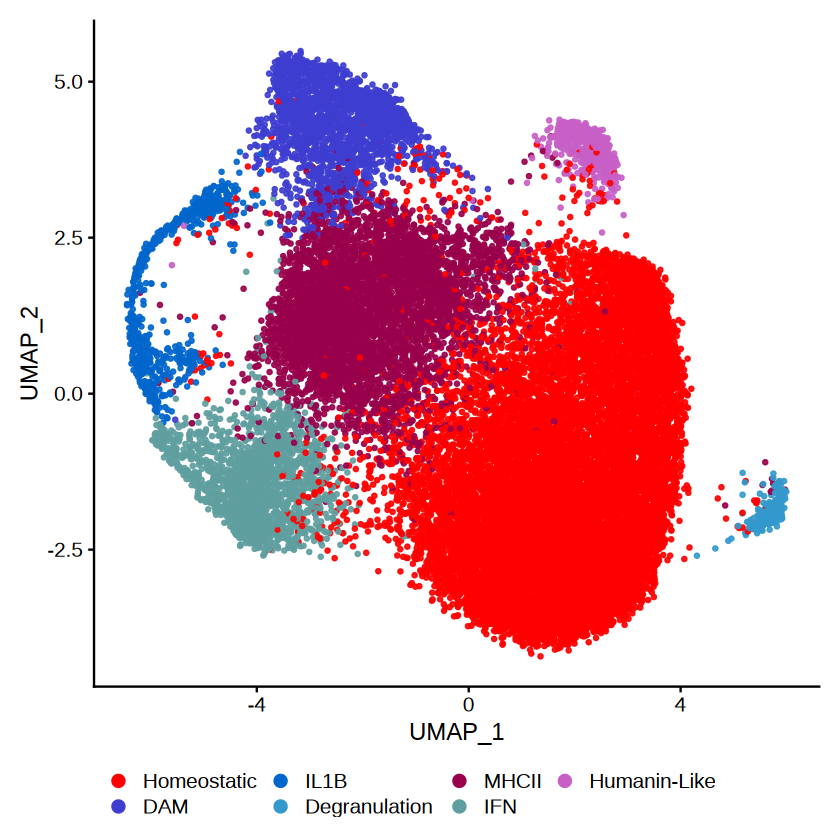

In [28]:
## BJ data

bj_col <- c("#FF0000","#3D3DD0","#0066CC","#3399CC","#99004C","#5F9EA0","#C660C6")

p1 <- DimPlot(obj1, reduction = "umap", pt.size = 0.8, alpha = 0.9,cols = bj_col)
p1$data$ident <- factor(p1$data$ident, levels = c("Homeostatic","DAM","IL1B","Degranulation","MHCII","IFN","Humanin-Like"))
p1 <- p1+theme(legend.position = "bottom")
p1
ggsave(plot = p1, "bj_umap.pdf", height = 4, width = 4)

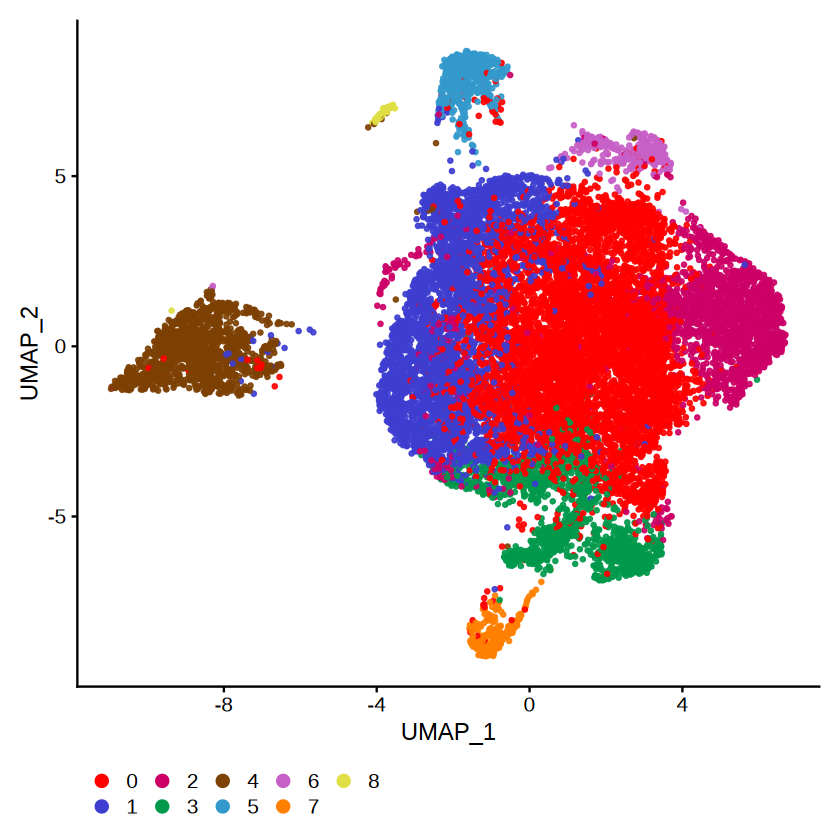

In [27]:
## KD data
kd_col <- c("#FF0000","#3D3DD0","#CC0066","#00994C",
"#7D4104","#3399CC","#C660C6","#FF8000","#DFDF45")


p1 <- DimPlot(obj2, reduction = "umap", pt.size = 0.8, alpha = 0.9,cols = kd_col)
p1$data$ident <- factor(p1$data$ident, levels = c(0:8))
p1 <- p1+theme(legend.position = "bottom")
p1
ggsave(plot = p1, "kd_umap.pdf", height = 4, width = 4)

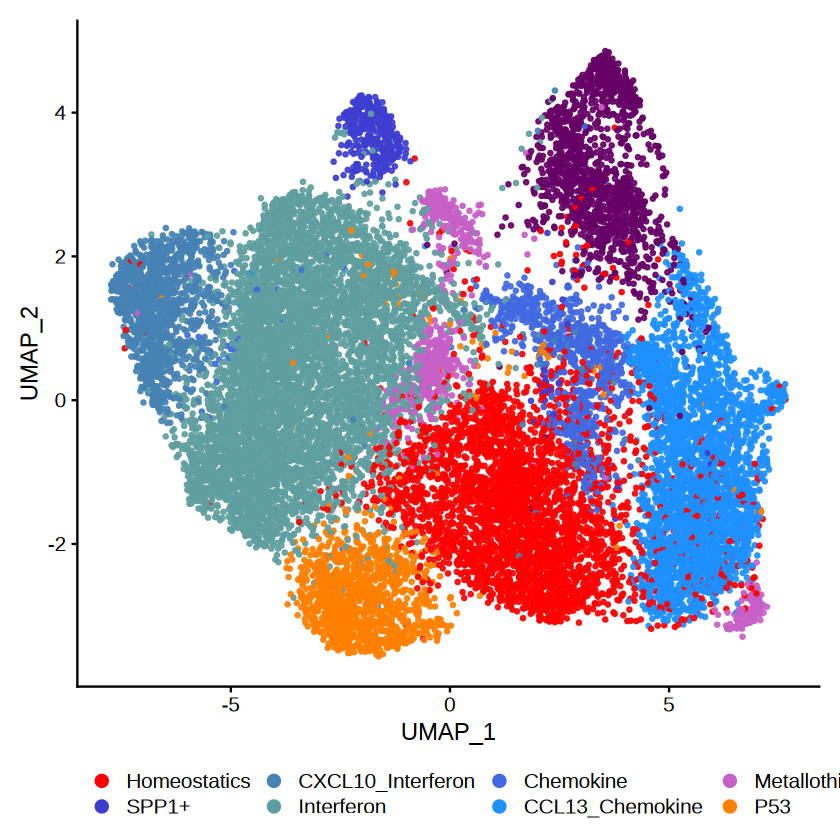

In [26]:
## MD data
md_col <- c("#FF0000","#3D3DD0","#4682B4","#5F9EA0",
"#4169E1","#1E90FF","#C660C6","#FF8000","#660066")


p1 <- DimPlot(obj3, reduction = "umap", pt.size = 0.8, alpha = 0.9,cols = md_col)
p1$data$ident <- factor(p1$data$ident, levels = c(
"Homeostatics","SPP1+","CXCL10_Interferon","Interferon",
"Chemokine","CCL13_Chemokine","Metallothionins","P53","Proliferative"))

p1 <- p1+theme(legend.position = "bottom")
p1
ggsave(plot = p1, "md_umap.pdf", height = 4, width = 4)

In [29]:
# analysis of integrated object
sobj_new <- qread("/home/a.garg/integration_project/step_10/ROSMAP_edited_cell_type/Allfour_SCT_integration_layer_wdedited_meta.qs", nthreads = 6)

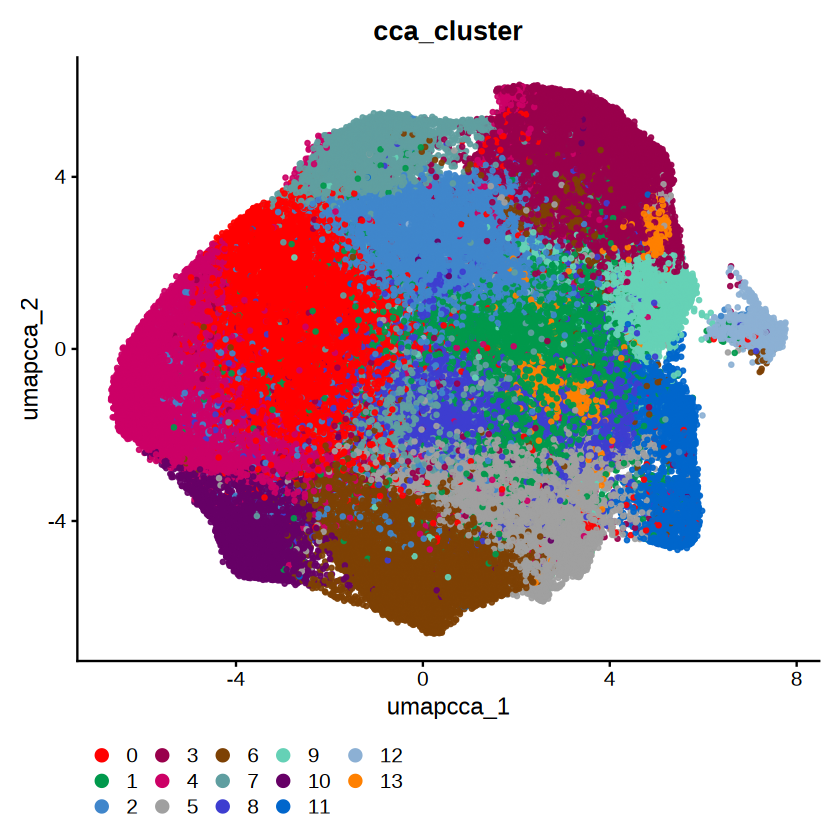

In [47]:
## MD data
int_col <- c("#FF0000","#00994C","#4086CB","#99004C",
"#CC0066","#A0A0A0","#7D4104","#5F9EA0",
"#3D3DD0","#65D1B6","#660066","#0066CC",
"#8CB0D4","#FF8000")

p1 <- DimPlot(sobj_new, reduction = "umap.cca", group.by = "cca_cluster", raster = FALSE, cols = int_col, pt.size = 0.8, alpha = 0.9)
p1$data$cca_cluster <- factor(p1$data$cca_cluster, levels = c(0:13))

p1 <- p1+theme(legend.position = "bottom")
p1
ggsave(plot = p1, "int_umap.pdf", height = 5, width = 4)

In [3]:
# n <- levels(sobj_new) %>% length()
# qual_col_pals <- brewer.pal.info[brewer.pal.info$category == "qual", ]
# col_vector <- unlist(mapply(brewer.pal, qual_col_pals$maxcolors, rownames(qual_col_pals)))
# a <- DiscretePalette(n, palette = "set2")

# mycolors <- colorRampPalette(brewer.pal(8, "Set1"))(8)

Warning message in DiscretePalette(n, palette = "set2"):
“Not enough colours in specified palette”


In [15]:
# #col_vector[1:18]

# col_man<- c('#7FC97F','#BEAED4','#65d1b6','#f7f77b',
# '#386CB0','#F0027F','#BF5B17','#666666',
# '#1B9E77','#ffc192','#7570B3','#82536b',
# '#66A61E','#E6AB02','#A6761D','#6a0404',
# '#A6CEE3','#1F78B4')

In [ ]:
# p2 <- DimPlot(sobj_new, reduction = "umap.cca", group.by = "cca_cluster", raster = FALSE, cols = col_man, pt.size = 0.8, alpha = 0.9)
# p2$data$cca_cluster <- factor(p2$data$cca_cluster, levels = 0:99)
# p2

In [5]:
#mycolors
bar_col <- c('#e2bb9b','#99ad6a','#bfc0c1','#5f82be')

In [28]:
df <-
    table(sobj_new$batch, sobj_new$cca_cluster) %>%
    as.data.frame() %>%
    group_by(Var2) %>%
    mutate(frac = Freq / sum(Freq) * 100) %>%
    ungroup() %>%
    filter(frac > 0) %>%
    dplyr::rename(
        "CCA cluster" = Var2,
        "Datasets" = Var1,
        "Percentage" = frac
    )

In [41]:
table(sobj_new$batch)


        BJ         KD         MD ROSMAP_MIT 
     25407      15726      15350     166339 

In [30]:
# Convert the column to character
df$Datasets <- as.character(df$Datasets)

# Replace values
df$Datasets[df$Datasets == "BJ"] <- "Xenografted mic"
df$Datasets[df$Datasets == "MD"] <- "iPSC-MLC CRISPR i/a"
df$Datasets[df$Datasets == "KD"] <- "Human parietal cortex"
df$Datasets[df$Datasets == "ROSMAP_MIT"] <- "Human multiple region"

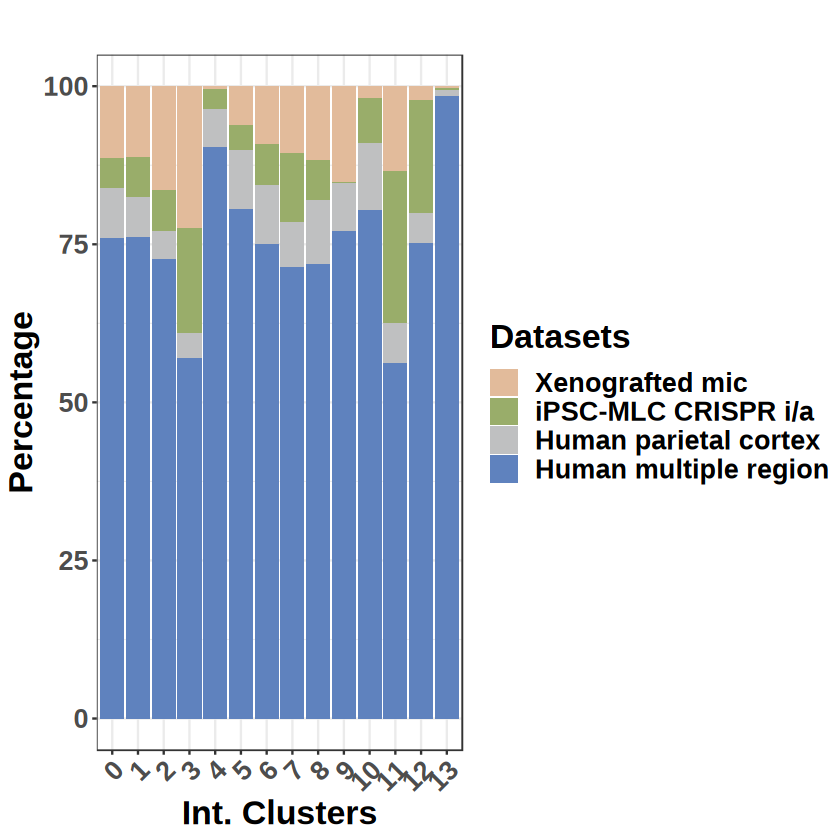

In [40]:
df$Datasets <- factor(df$Datasets, levels = c("Xenografted mic","iPSC-MLC CRISPR i/a","Human parietal cortex", "Human multiple region"))
df$`CCA cluster` <- factor(df$`CCA cluster`, levels = as.character(0:99))
p <-
    ggplot(df, aes(x = `CCA cluster`, y = Percentage, fill = Datasets)) +
    # ggplot(df, aes(x = Datasets, y = Percentage, fill = `CCA clusters`)) +
    geom_bar(stat = "identity") +
    scale_fill_manual(values = bar_col) +
    theme_bw() +
    theme(text = element_text(size = 20, face = "bold")) +
    theme(axis.text.x = element_text(angle = 45, hjust = 1)) +
    ggtitle("") +
    ylab("Percentage") +
    xlab("Int. Clusters") 
p
ggsave(plot = p, "batch_percent.pdf", height = 4, width = 7)

In [4]:
sobj_new$Cell_type[sobj_new$Cell_type == "Homeostatic-BJ"] <- "Homeostatic"
sobj_new$Cell_type[sobj_new$Cell_type == "Homeostatic-MD"] <- "Homeostatic"
sobj_new$Cell_type[sobj_new$Cell_type == "Homeostatic-ROSMAP_MIT"] <- "Homeostatic"
sobj_new@meta.data <- sobj_new@meta.data %>% mutate(across(Cell_type, str_replace, "_", "-"))
##########################################################################################################
BJ_cell_type <- c("Homeostatic", "Activated", "IFN", "IL1B", "MHCII")
KD_cell_type <- c("Mic-resting", "Mic-activated", "Mic-reduced", "Mic-inflammatory", "Mic-stress")
MD_cell_type <- c("SPP1+", "Chemokine", "CCL13-Chemokine", "CXCL10-Interferon", "Interferon")
ROSMAP_cell_type <- c("Inflammatory-I", "Inflammatory-II", "Inflammatory-III", "Antiviral", "Cycling", "Glycolytic", "Lipid-Processing", "Neuronal-Surveillance", "Phagocytic", "Ribosome-Biogenesis", "Stress-Signature")

all_cell_type <- c(BJ_cell_type, KD_cell_type, MD_cell_type, ROSMAP_cell_type)
sobj_new$Cell_type <- factor(as.character(sobj_new$Cell_type), levels = all_cell_type)

Warning message:
“There was 1 warning in `mutate()`.
ℹ In argument: `across(Cell_type, str_replace, "_", "-")`.
Caused by warning:
! The `...` argument of `across()` is deprecated as of dplyr 1.1.0.
Supply arguments directly to `.fns` through an anonymous function instead.

  # Previously
  across(a:b, mean, na.rm = TRUE)

  # Now
  across(a:b, \(x) mean(x, na.rm = TRUE))”


In [5]:
# cell proportion in aech cluster
p <- sobj_new@meta.data %>%
    split(.$batch) %>%
    #.[3] %>%
    lapply(function(i) {
        i %>%
            count(cca_cluster, Cell_type) %>%
            mutate(cca_cluster = factor(cca_cluster, levels = 0:99)) %>%
            mutate(frac = n / sum(n)) %>% # % dataset
            # % of cell type
            group_by(Cell_type) %>%
            mutate(frac_cell = n / sum(n)) %>%
            ungroup() %>%
            # % cluster
            group_by(cca_cluster) %>%
            mutate(frac_clus = n / sum(n)) %>%
            ungroup() %>%
            ggplot(aes(
                y = Cell_type, x = cca_cluster,
                # fill= frac
                fill = frac_cell
                # fill= frac_clus
            )) +
            geom_tile() +
            scale_fill_distiller(palette = "Reds", direction = 1) +
            labs(title = unique(i$batch)) +
            coord_fixed() +
            geom_tile(color = "black", lwd = 1) +
            theme(text = element_text(size = 20, face = "bold")) +
            xlab("Integrated Clusters") +
            ylab("Cell states")+
            theme(axis.text.x = element_text(angle = 45, hjust = 1))
    })

$BJ


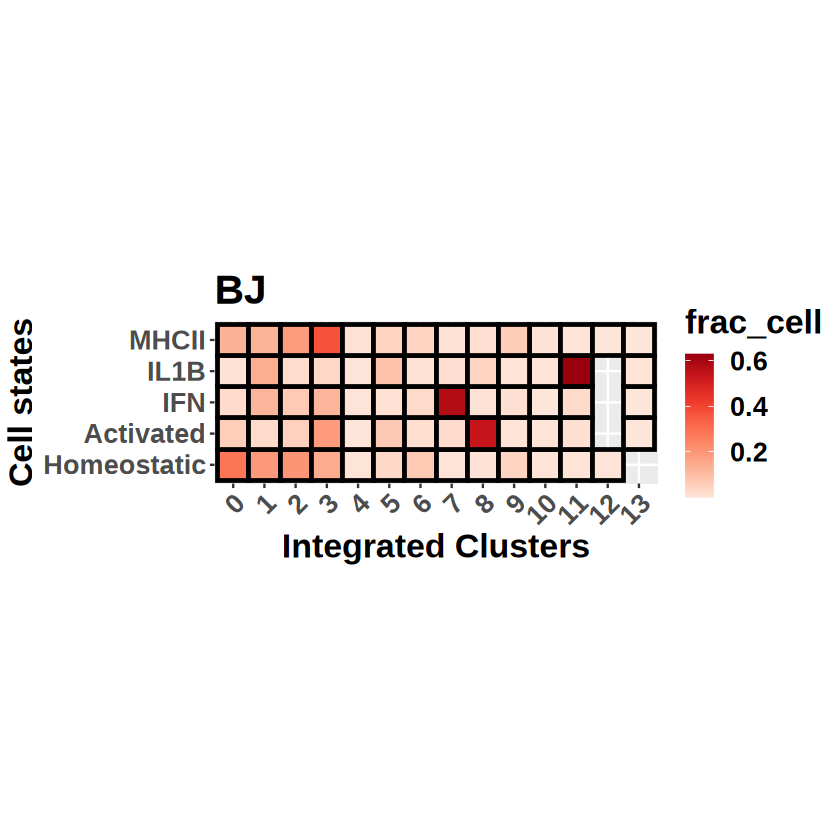

In [16]:
p[1]
ggsave(plot = p[[1]], "BJ_frac_heatmap.pdf", height = 8, width = 8)

$KD


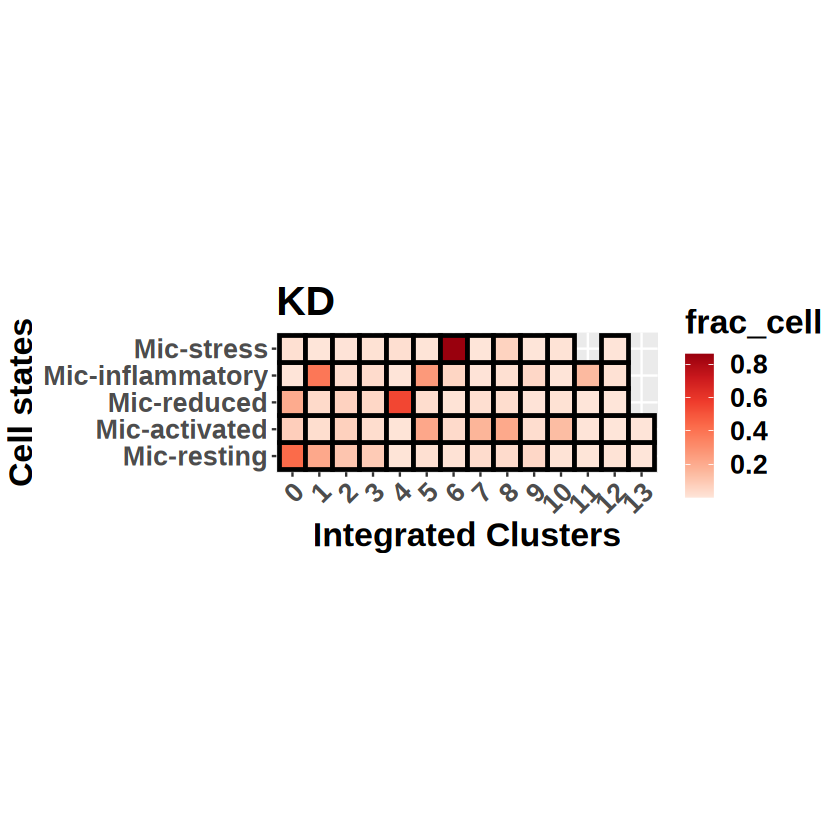

In [15]:
p[2]
ggsave(plot = p[[2]], "KD_frac_heatmap.pdf", height = 8, width = 8)

$MD


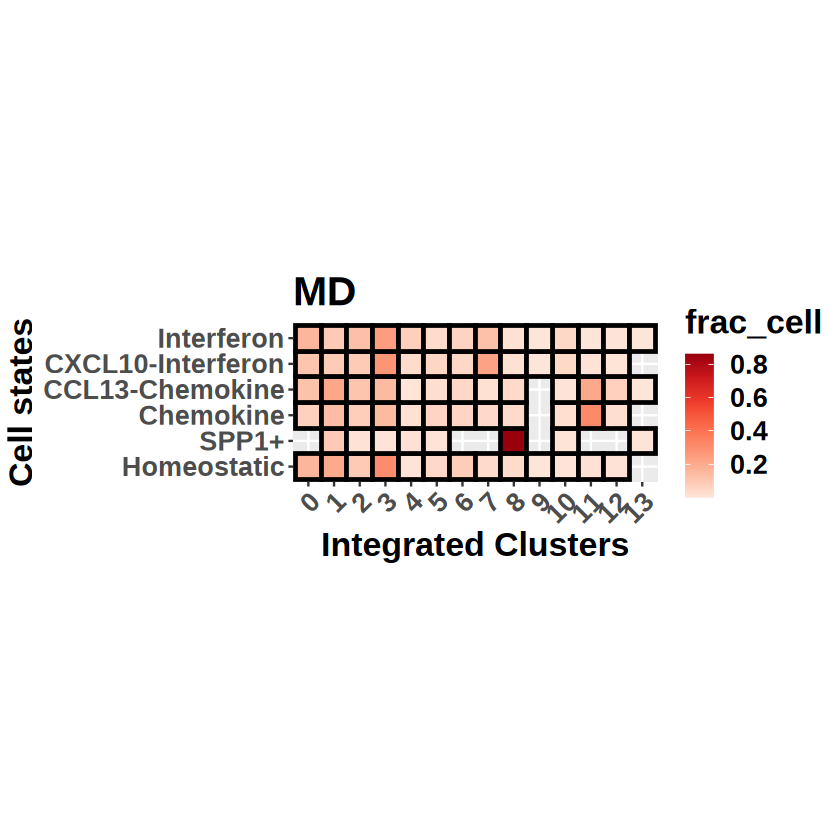

In [14]:
p[3]
ggsave(plot = p[[3]], "MD_frac_heatmap.pdf", height = 8, width = 8)


$ROSMAP_MIT


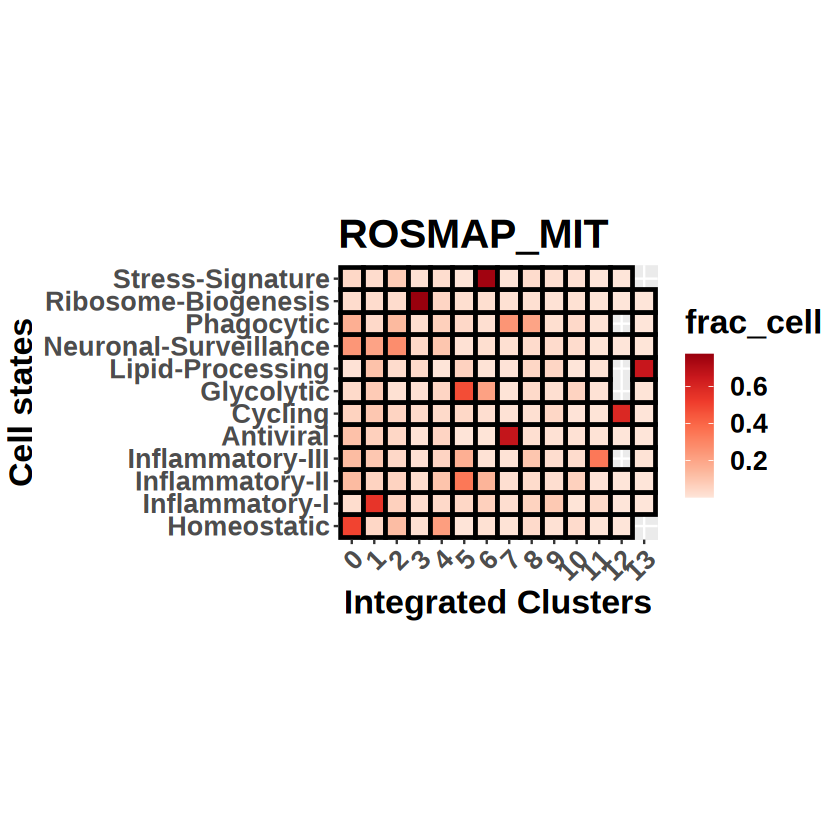

In [13]:
p[4]
ggsave(plot = p[[4]], "ROSMAP_frac_heatmap.pdf", height = 8, width = 8)

Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.


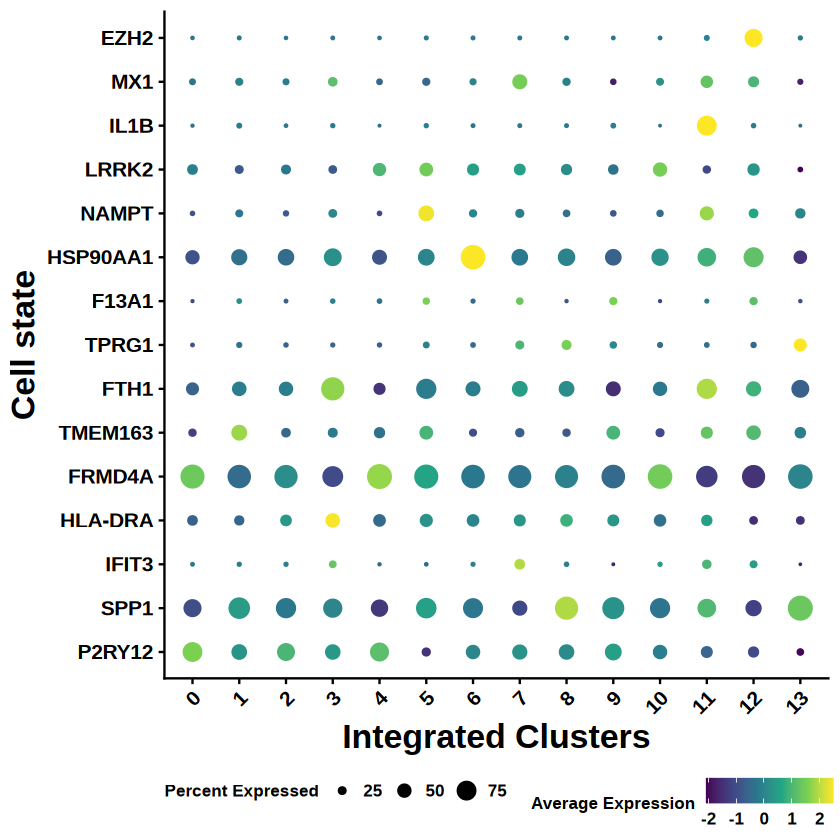

In [4]:
# Marker analysis

Idents(sobj_new) <- sobj_new$cca_cluster

homeostatic <- c("P2RY12")
dam <- c("SPP1")
ifn <- c("IFIT3")
mhc <- c("HLA-DRA")
neuronal_surveillance <- c("FRMD4A")
inflammatory_I <- c("TMEM163")
Ribosome_biogenesis <- c("FTH1")
lipid_processing <- c("TPRG1")
Phagocytic <- c("F13A1")
Stress_sig <- c("HSP90AA1")
glycolytic <- c("NAMPT")
inflammatory_II <- c("LRRK2")
inflammatory_III <- c("IL1B") # IL1B
Antiviral <- c("MX1")
cycling <- c("EZH2")


all_gene_list <- c(
    homeostatic, dam, ifn, mhc, neuronal_surveillance, inflammatory_I, Ribosome_biogenesis, lipid_processing,
    Phagocytic, Stress_sig, glycolytic, inflammatory_II, inflammatory_III,
    Antiviral, cycling
)

all_gene_list <- as.list(all_gene_list)
names(all_gene_list) <- c(
    "Homeostatic", "Activated", "IFN", "MHCII", "Neuronal_surveillance",
    "Inflammatory_I", "Ribosome_biogenesis", "Lipid_processing",
    "Phagocytic", "Stress_sig", "Glycolytic", "Inflammatory_II",
    "Inflammatory_III", "Antiviral", "Cycling"
)

Idents(sobj_new) <- "cca_cluster"
all_gene_list2 <- c(
    homeostatic, dam, ifn, mhc, neuronal_surveillance, inflammatory_I, Ribosome_biogenesis, lipid_processing,
    Phagocytic, Stress_sig, glycolytic, inflammatory_II, inflammatory_III,
    Antiviral, cycling
)
p <- DotPlot(object = sobj_new, features = unique(all_gene_list2)) + RotatedAxis() + scale_color_viridis_c(direction = 1) + coord_flip()
p <- p + theme(text = element_text(size = 20, face = "bold")) +
    ylab("Integrated Clusters") +
    xlab("Cell state") +
    theme(axis.text.x = element_text(angle = 45, hjust = 1)) +
    theme(
        legend.title = element_text(size = 10),
        legend.text = element_text(size = 10)
    ) + theme(legend.position = "bottom")
            
p$data$id <- factor(p$data$id, levels = 0:99)


p
ggsave(plot = p, "dotplot_marker_23.pdf", height = 5, width = 6)

module score dotplot

In [13]:
sobj_new

An object of class Seurat 
64798 features across 222822 samples within 2 assays 
Active assay: SCT (26942 features, 3000 variable features)
 3 layers present: counts, data, scale.data
 1 other assay present: RNA
 4 dimensional reductions calculated: pca, umap.unintegrated, integrated.cca, umap.cca

In [15]:

Idents(sobj_new) <- sobj_new$cca_cluster

Homeostatic <- c( "TMEM119","P2RY12","P2RY13","CX3CR1","SELPLG","BIN1")
Activated <- c("CD9", "APOE", "TREM2","TYROBP","CD63","CD68","AXL",
        "SPP1","CTSB","LPL", "ITGAX", "CST7", "CSF1", "GPNMB","IRF8","FTH1")
IFN <- c("IFITM3","IFIT3","CXCL10","STAT1","IRF7","ISG15")
IL1B <- c("CCL4L2","CCL4","CCL3L1", "CCL8" ,"CCL13", "CCL2", "IL1B", "CCL3") # IL1B
MHCII <-  c("HLA-A","HLA-E","HLA-DRB1", "HLA-DPB1","HLA-DRA","CD83","CD81","CD74")
Neuronal_Surveillance <- c("FRMD4A", "INO80D")
Inflammatory_I<- c("TMEM163","CPEB4")
Ribosome_biogenesis <- c("FTH1","FTL")
Lipid_processing <- c("MYO1E","PTPRG")
Phagocytic <- c("F13A1","CD163")
Stress_Signature <- c("HSP90AA1","HSPH1")
Glycolytic<- c("NAMPT","SLC2A3")
Inflammatory_II <- c("LRRK2","SPON1")

Antiviral <- c("MX1","IFI44L")
Cycling <- c("EZH2","BRIP1")

all_gene_list <- list(
    Homeostatic, Activated, IFN, IL1B, MHCII, 
    Inflammatory_I,Inflammatory_II,
    Stress_Signature, Phagocytic,Glycolytic,  
    Ribosome_biogenesis,Lipid_processing,Neuronal_Surveillance, 
    Antiviral, Cycling
)

names(all_gene_list) <- c(
    "Homeostatic", "Activated", "IFN",  "IL1B","MHCII", 
    "Inflammatory-I","Inflammatory-II",
    "Stress-Signature", "Phagocytic","Glycolytic",  
    "Ribosome-biogenesis","Lipid-processing","Neuronal-Surveillance", 
    "Antiviral", "Cycling"
)
all_gene_list


$Homeostatic
[1] "TMEM119" "P2RY12"  "P2RY13"  "CX3CR1"  "SELPLG"  "BIN1"   

$Activated
 [1] "CD9"    "APOE"   "TREM2"  "TYROBP" "CD63"   "CD68"   "AXL"    "SPP1"  
 [9] "CTSB"   "LPL"    "ITGAX"  "CST7"   "CSF1"   "GPNMB"  "IRF8"   "FTH1"  

$IFN
[1] "IFITM3" "IFIT3"  "CXCL10" "STAT1"  "IRF7"   "ISG15" 

$IL1B
[1] "CCL4L2" "CCL4"   "CCL3L1" "CCL8"   "CCL13"  "CCL2"   "IL1B"   "CCL3"  

$MHCII
[1] "HLA-A"    "HLA-E"    "HLA-DRB1" "HLA-DPB1" "HLA-DRA"  "CD83"     "CD81"    
[8] "CD74"    

$`Inflammatory-I`
[1] "TMEM163" "CPEB4"  

$`Inflammatory-II`
[1] "LRRK2" "SPON1"

$`Stress-Signature`
[1] "HSP90AA1" "HSPH1"   

$Phagocytic
[1] "F13A1" "CD163"

$Glycolytic
[1] "NAMPT"  "SLC2A3"

$`Ribosome-biogenesis`
[1] "FTH1" "FTL" 

$`Lipid-processing`
[1] "MYO1E" "PTPRG"

$`Neuronal-Surveillance`
[1] "FRMD4A" "INO80D"

$Antiviral
[1] "MX1"    "IFI44L"

$Cycling
[1] "EZH2"  "BRIP1"

In [16]:
sobj_new <- AddModuleScore(sobj_new, features = all_gene_list)

In [17]:
colnames(sobj_new@meta.data)

[1] "orig.ident"            "nCount_RNA"            "nFeature_RNA"         
 [4] "dataset"               "Sample.ID"             "batch"                
 [7] "Cell_type"             "RNA_snn_res.1"         "seurat_clusters"      
[10] "percent.rbs"           "Gender"                "PMI"                  
[13] "AOD"                   "Status"                "nAPOE"                
[16] "ADAD"                  "clusters_data"         "brainRegion"          
[19] "age_death"             "msex"                  "pmi"                  
[22] "ADdiag3types"          "nCount_SCT"            "nFeature_SCT"         
[25] "unintegrated_clusters" "barcode"               "cca_cluster"          
[28] "percent.mt"            "percent.ribo"          "Integrated_cell_type" 
[31] "Cluster1"              "Cluster2"              "Cluster3"             
[34] "Cluster4"              "Cluster5"              "Cluster6"             
[37] "Cluster7"              "Cluster8"              "Cluster9"             
[40] "Cluster10"             "Cluster11"             "Cluster12"            
[43] "Cluster13"             "Cluster14"             "Cluster15"

In [19]:
sobj_new_cols <- colnames(sobj_new@meta.data)
#sobj_new_cols[grep("Cluster[0-9]+$", sobj_new_cols)] <- paste0("mod-", names(all_gene_list))
sobj_new_cols[grep("Cluster[0-9]+$", sobj_new_cols)] <- names(all_gene_list)
colnames(sobj_new@meta.data) <- sobj_new_cols
#markers_mod <- paste0("mod-", names(all_gene_list))
markers_mod <- names(all_gene_list)

Warning message:
“The following variables were found in both object meta data and the default assay: IL1B
Returning meta data; if you want the feature, please use the assay's key (eg. sct_IL1B)”
Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.


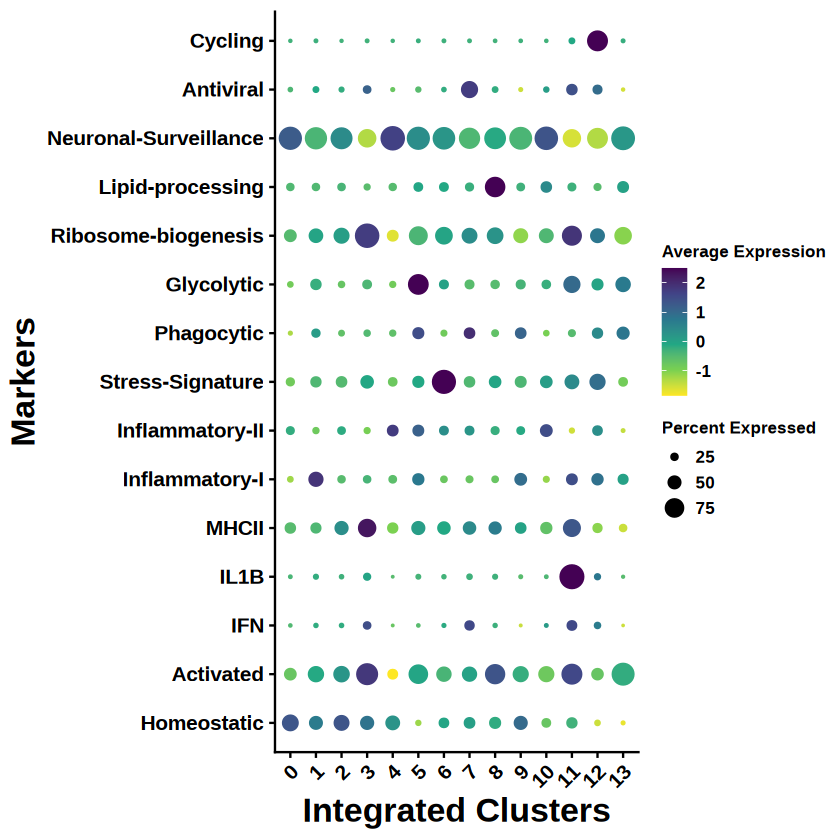

In [21]:
p <- DotPlot(sobj_new , features = , markers_mod , assay = "SCT",
        cluster.idents = F, group.by = "cca_cluster")  + RotatedAxis() + 
        scale_color_viridis_c(direction = -1) + coord_flip()
p <- p + theme(text = element_text(size = 20, face = "bold")) +
    ylab("Integrated Clusters") +
    xlab("Markers") +
    theme(axis.text.x = element_text(angle = 45, hjust = 1)) +
    theme(
        legend.title = element_text(size = 10),
        legend.text = element_text(size = 10)
    )
p$data$id <- factor(p$data$id, levels = 0:99)

p

ggsave(plot = p, "module_dotplot_marker_1march.pdf", height = 5, width = 7, bg = "white")

for cluster 9 and 10 we did not find any resaon to remove henceforth we are including it 

In [39]:
sobj_new <- qread("/home/a.garg/integration_project/step_10/ROSMAP_edited_cell_type/Allfour_SCT_integration_layer_wdedited_meta.qs", nthreads = 6)

In [ ]:
# subset
n1_subset <- subset(sobj_new, subset = batch =="BJ" )
n2_subset <- subset(sobj_new, subset = batch =="KD" )
n3_subset <- subset(sobj_new, subset = batch =="MD" )
n4_subset <- subset(sobj_new, subset = batch =="ROSMAP_MIT")

In [4]:
sobj_new$Integrated_cell_type <- sobj_new$cca_cluster
sobj_new$Integrated_cell_type  <- ifelse(sobj_new$Integrated_cell_type==0,"Homeostatic",
                          ifelse(sobj_new$Integrated_cell_type ==1,"IFN-III",
                                 ifelse(sobj_new$Integrated_cell_type ==2,"Neuronal Surveillance",
                                        ifelse(sobj_new$Integrated_cell_type ==3,"MHCII",
                                               ifelse(sobj_new$Integrated_cell_type==4,"Mic reduced",
                                                      ifelse(sobj_new$Integrated_cell_type ==5,"IFN-II",
                                                             ifelse(sobj_new$Integrated_cell_type ==6,"Stress",
                                                             ifelse(sobj_new$Integrated_cell_type ==7,"IFN-I",
                                                             ifelse(sobj_new$Integrated_cell_type ==8,"Activated",
                                                             ifelse(sobj_new$Integrated_cell_type ==9,"Unknown1",
                                                             ifelse(sobj_new$Integrated_cell_type ==10,"Unknown2",
                                                             ifelse(sobj_new$Integrated_cell_type ==11,"IL1B",
                                                             ifelse(sobj_new$Integrated_cell_type ==12,"Cycling","Lipid Processing")))))))))))))

In [5]:
col_man<- c('#7FC97F','#BEAED4','#65d1b6','#f7f77b',
'#386CB0','#F0027F','#BF5B17','#666666',
'#1B9E77','#ffc192','#7570B3','#82536b',
'#66A61E','#E6AB02','#A6761D','#6a0404',
'#A6CEE3','#1F78B4')

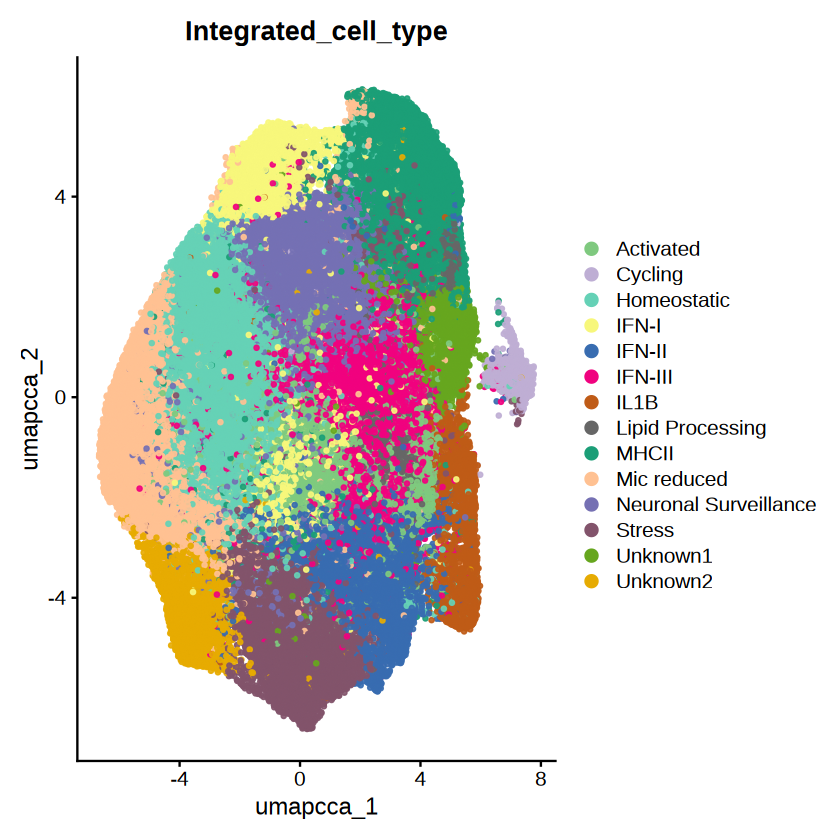

In [6]:
p2 <- DimPlot(sobj_new, reduction = "umap.cca", group.by = "Integrated_cell_type", 
raster = FALSE, cols = col_man, pt.size = 0.8, alpha = 0.9)
p2

With colonna markers

genescore for all colonna marker

In [5]:
Idents(sobj_new) <- sobj_new$cca_cluster

Homeostatic <- c( "TMEM119","P2RY12","P2RY13","CX3CR1","SELPLG","BIN1")
Activated <- c("CD9", "APOE", "TREM2","TYROBP","CD63","CD68","AXL",
        "SPP1","CTSB","LPL", "ITGAX", "CST7", "CSF1", "GPNMB","IRF8","FTH1")
IFN <- c("IFITM3","IFIT3","CXCL10","STAT1","IRF7","ISG15")
MHCII <-  c("HLA-A","HLA-E","HLA-DRB1", "HLA-DPB1","HLA-DRA","CD83","CD81","CD74")

all_gene_list <- list(
    Homeostatic, Activated, IFN, MHCII
)

names(all_gene_list) <- c(
    "Homeostatic", "Activated", "IFN", "MHCII")
all_gene_list

$Homeostatic
[1] "TMEM119" "P2RY12"  "P2RY13"  "CX3CR1"  "SELPLG"  "BIN1"   

$Activated
 [1] "CD9"    "APOE"   "TREM2"  "TYROBP" "CD63"   "CD68"   "AXL"    "SPP1"  
 [9] "CTSB"   "LPL"    "ITGAX"  "CST7"   "CSF1"   "GPNMB"  "IRF8"   "FTH1"  

$IFN
[1] "IFITM3" "IFIT3"  "CXCL10" "STAT1"  "IRF7"   "ISG15" 

$MHCII
[1] "HLA-A"    "HLA-E"    "HLA-DRB1" "HLA-DPB1" "HLA-DRA"  "CD83"     "CD81"    
[8] "CD74"

In [5]:
sobj_new <- AddModuleScore(sobj_new, features = all_gene_list)

In [7]:
sobj_new_cols <- colnames(sobj_new@meta.data)
#sobj_new_cols[grep("Cluster[0-9]+$", sobj_new_cols)] <- paste0("mod-", names(all_gene_list))
sobj_new_cols[grep("Cluster[0-9]+$", sobj_new_cols)] <- names(all_gene_list)
colnames(sobj_new@meta.data) <- sobj_new_cols
#markers_mod <- paste0("mod-", names(all_gene_list))
markers_mod <- names(all_gene_list)

Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.


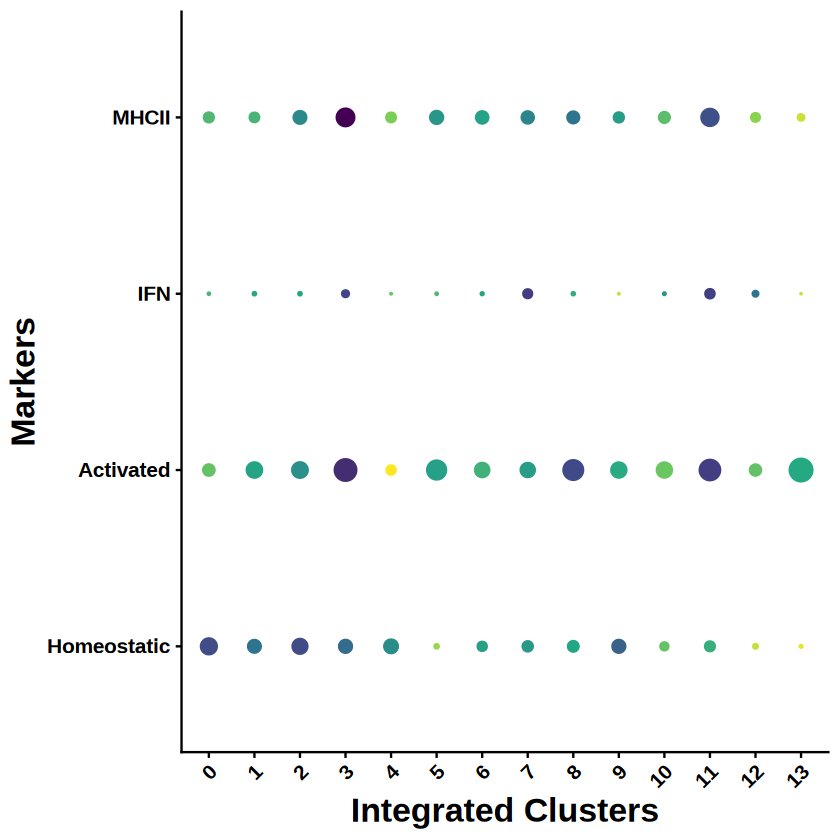

In [15]:
p <- DotPlot(sobj_new , features = , markers_mod , assay = "SCT",
        cluster.idents = F, group.by = "cca_cluster")  + RotatedAxis() + 
        scale_color_viridis_c(direction = -1) + coord_flip()
p <- p + theme(text = element_text(size = 20, face = "bold")) +
    ylab("Integrated Clusters") +
    xlab("Markers") +
    theme(axis.text.x = element_text(angle = 45, hjust = 1)) +
    theme(
        legend.title = element_text(size = 10),
        legend.text = element_text(size = 10)
    )
p$data$id <- factor(p$data$id, levels = 0:99)

p<- p+NoLegend()

p
ggsave(plot = p, "standared_module_dotplot_marker_part1.pdf", height = 2, width = 5, bg = "white")

Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.


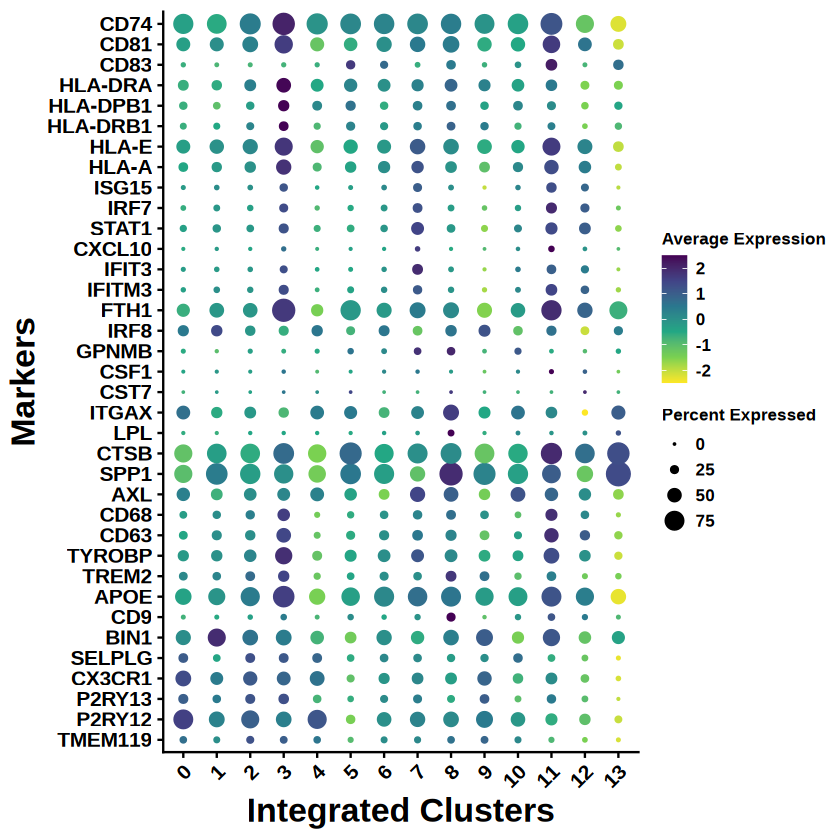

In [10]:
all_gene_list2 <- c("TMEM119","P2RY12","P2RY13","CX3CR1","SELPLG","BIN1",
"CD9", "APOE", "TREM2","TYROBP","CD63","CD68","AXL",
"SPP1","CTSB","LPL", "ITGAX", "CST7", "CSF1", "GPNMB","IRF8","FTH1",
"IFITM3","IFIT3","CXCL10","STAT1","IRF7","ISG15",
"HLA-A","HLA-E","HLA-DRB1", "HLA-DPB1","HLA-DRA","CD83","CD81","CD74")


p <- DotPlot(sobj_new , features = all_gene_list2 , assay = "SCT",
cluster.idents = F, group.by = "cca_cluster")  + RotatedAxis() + 
        scale_color_viridis_c(direction = -1) + coord_flip()
p <- p + theme(text = element_text(size = 20, face = "bold")) +
    ylab("Integrated Clusters") +
    xlab("Markers") +
    theme(axis.text.x = element_text(angle = 45, hjust = 1)) +
    theme(
        legend.title = element_text(size = 10),
        legend.text = element_text(size = 10)
    )
p$data$id <- factor(p$data$id, levels = 0:99)

#p<- p+NoLegend()

p
ggsave(plot = p, "All_standared_each_colonna_gene_dotplot_marker.pdf", height = 7, width = 6, bg = "white")

With ROSMAP marker

In [40]:

Idents(sobj_new) <- sobj_new$cca_cluster

IL1B <- c("CCL4L2","CCL4","CCL3L1", "CCL8" ,"CCL13", "CCL2", "IL1B", "CCL3") # IL1B
Neuronal_Surveillance <- c("FRMD4A", "INO80D")
Inflammatory_I<- c("TMEM163","CPEB4")
Ribosome_biogenesis <- c("FTH1","FTL")
Lipid_processing <- c("MYO1E",
#"PTPRG",
"TPRG1")
Phagocytic <- c("F13A1","CD163")
Stress_Signature <- c("HSP90AA1","HSPH1")
Glycolytic<- c("NAMPT","SLC2A3")
Inflammatory_II <- c("LRRK2","SPON1")

Antiviral <- c("MX1","IFI44L")
Cycling <- c("EZH2","BRIP1")

all_gene_list <- list(
    IL1B, Neuronal_Surveillance, 
    Inflammatory_I, Ribosome_biogenesis,Lipid_processing,
    Phagocytic,Stress_Signature, Glycolytic,  Inflammatory_II,
    Antiviral, Cycling
)

names(all_gene_list) <- c(
     "IL1B","Neuronal-Surveillance",
    "Inflammatory-I","Ribosome-biogenesis","Lipid-processing",
    "Phagocytic","Stress-Signature", "Glycolytic", "Inflammatory-II",
    "Antiviral", "Cycling"
)
all_gene_list

$IL1B
[1] "CCL4L2" "CCL4"   "CCL3L1" "CCL8"   "CCL13"  "CCL2"   "IL1B"   "CCL3"  

$`Neuronal-Surveillance`
[1] "FRMD4A" "INO80D"

$`Inflammatory-I`
[1] "TMEM163" "CPEB4"  

$`Ribosome-biogenesis`
[1] "FTH1" "FTL" 

$`Lipid-processing`
[1] "MYO1E" "TPRG1"

$Phagocytic
[1] "F13A1" "CD163"

$`Stress-Signature`
[1] "HSP90AA1" "HSPH1"   

$Glycolytic
[1] "NAMPT"  "SLC2A3"

$`Inflammatory-II`
[1] "LRRK2" "SPON1"

$Antiviral
[1] "MX1"    "IFI44L"

$Cycling
[1] "EZH2"  "BRIP1"

In [41]:
sobj_new <- AddModuleScore(sobj_new, features = all_gene_list)

In [42]:
sobj_new_cols <- colnames(sobj_new@meta.data)
#sobj_new_cols[grep("Cluster[0-9]+$", sobj_new_cols)] <- paste0("mod-", names(all_gene_list))
sobj_new_cols[grep("Cluster[0-9]+$", sobj_new_cols)] <- names(all_gene_list)
colnames(sobj_new@meta.data) <- sobj_new_cols
#markers_mod <- paste0("mod-", names(all_gene_list))
markers_mod <- names(all_gene_list)

Warning message:
“The following variables were found in both object meta data and the default assay: IL1B
Returning meta data; if you want the feature, please use the assay's key (eg. sct_IL1B)”
Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.


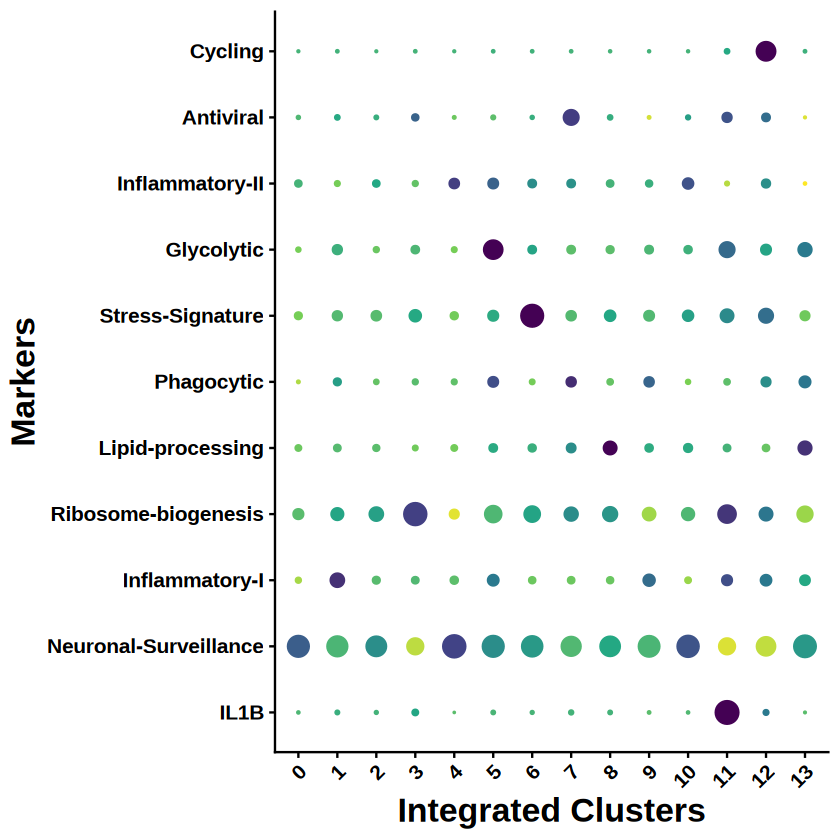

In [43]:
p <- DotPlot(sobj_new , features = , markers_mod , assay = "SCT",
        cluster.idents = F, group.by = "cca_cluster")  + RotatedAxis() + 
        scale_color_viridis_c(direction = -1) + coord_flip()
p <- p + theme(text = element_text(size = 20, face = "bold")) +
    ylab("Integrated Clusters") +
    xlab("Markers") +
    theme(axis.text.x = element_text(angle = 45, hjust = 1)) +
    theme(
        legend.title = element_text(size = 10),
        legend.text = element_text(size = 10)
    )
p$data$id <- factor(p$data$id, levels = 0:99)

p<- p+NoLegend()

p
ggsave(plot = p, "standared_module_dotplot_marker_part2.pdf", height = 4, width = 5, bg = "white")

Warning message:
“The following variables were found in both object meta data and the default assay: IL1B
Returning meta data; if you want the feature, please use the assay's key (eg. sct_IL1B)”
Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.


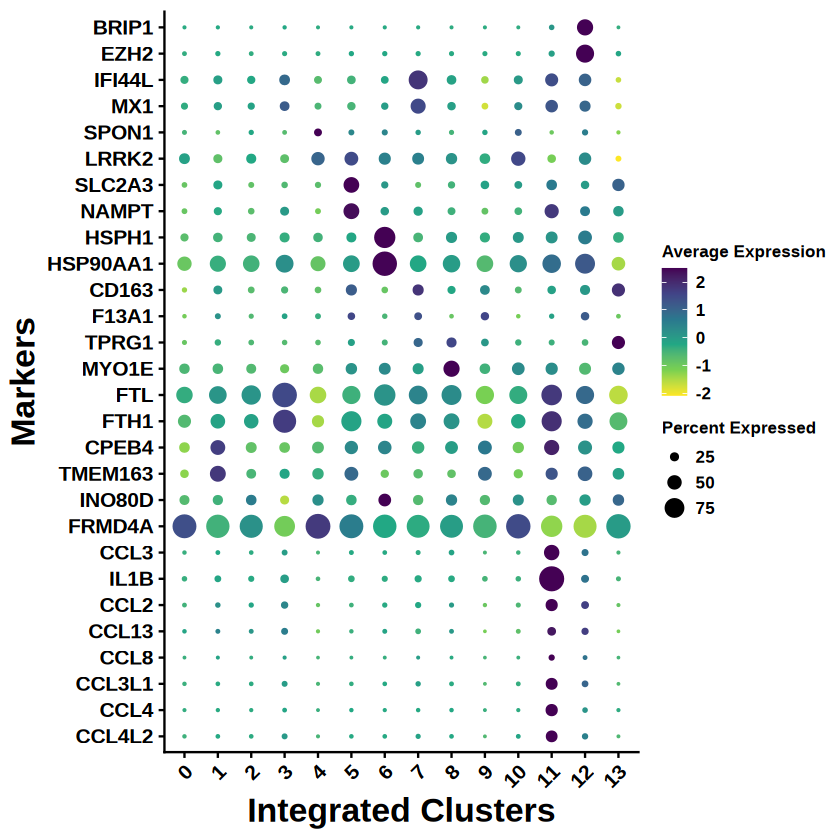

In [34]:
all_gene_list2 <- c("CCL4L2","CCL4","CCL3L1", "CCL8" ,"CCL13",
 "CCL2", "IL1B", "CCL3","FRMD4A", "INO80D","TMEM163","CPEB4",
"FTH1","FTL","MYO1E",
#"PTPRG",
"TPRG1",
"F13A1","CD163","HSP90AA1","HSPH1","NAMPT",
"SLC2A3","LRRK2","SPON1","MX1","IFI44L","EZH2","BRIP1")


p <- DotPlot(sobj_new , features = all_gene_list2 , assay = "SCT",
cluster.idents = F, group.by = "cca_cluster")  + RotatedAxis() + 
        scale_color_viridis_c(direction = -1) + coord_flip()
p <- p + theme(text = element_text(size = 20, face = "bold")) +
    ylab("Integrated Clusters") +
    xlab("Markers") +
    theme(axis.text.x = element_text(angle = 45, hjust = 1)) +
    theme(
        legend.title = element_text(size = 10),
        legend.text = element_text(size = 10)
    )
p$data$id <- factor(p$data$id, levels = 0:99)

#p<- p+NoLegend()

p
ggsave(plot = p, "All_standared_each_ROSMAP_gene_dotplot_marker.pdf", height = 7, width = 6, bg = "white")

BJ

Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.
Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.


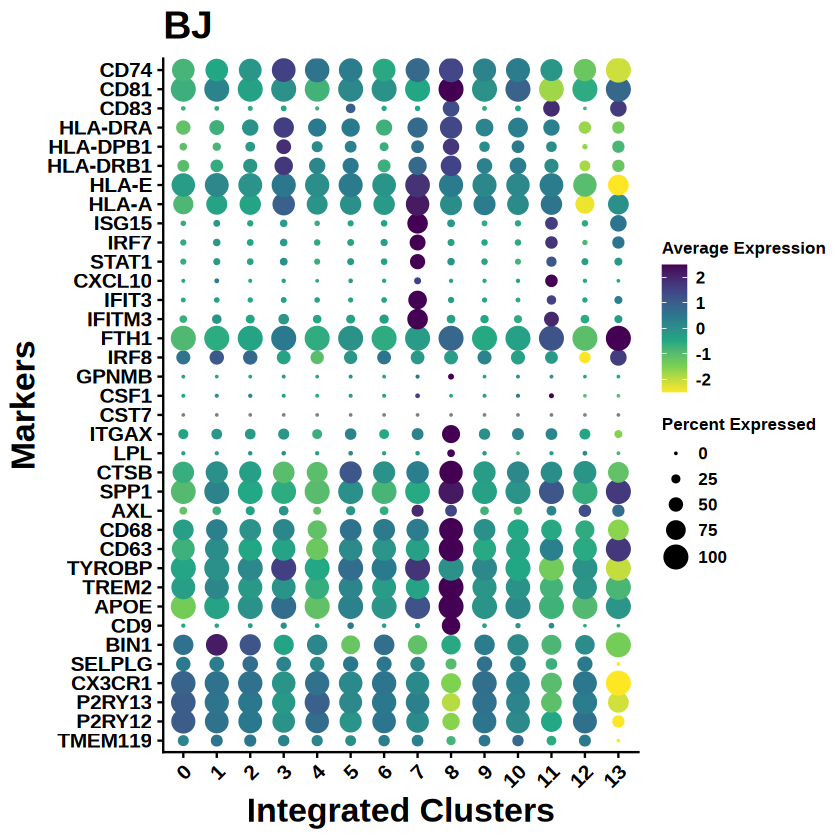

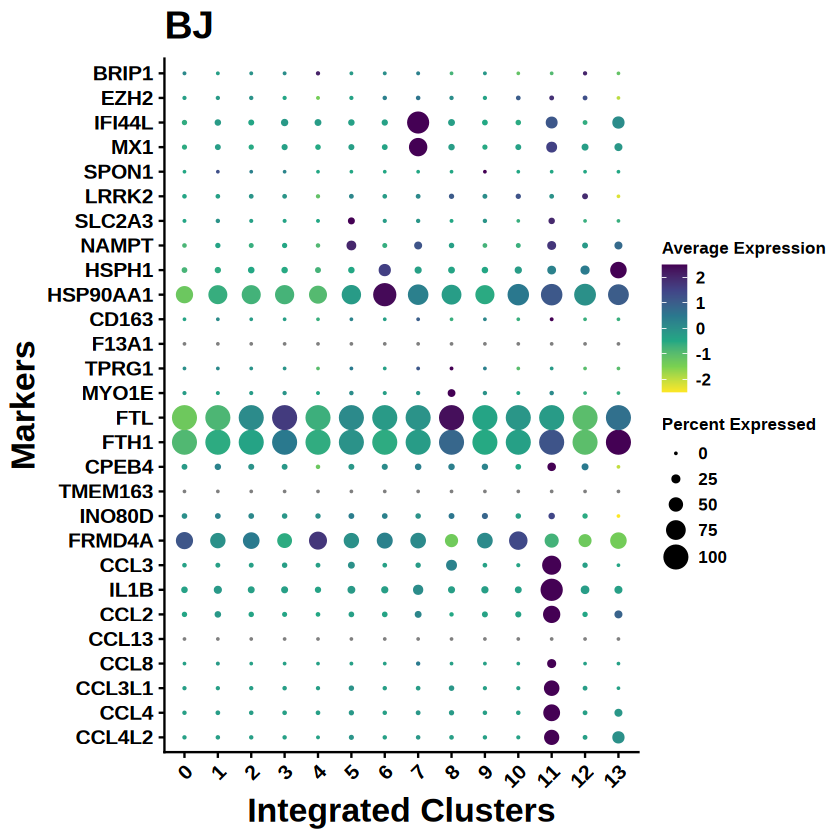

In [35]:
all_gene_list2 <- c("TMEM119","P2RY12","P2RY13","CX3CR1","SELPLG","BIN1",
"CD9", "APOE", "TREM2","TYROBP","CD63","CD68","AXL",
"SPP1","CTSB","LPL", "ITGAX", "CST7", "CSF1", "GPNMB","IRF8","FTH1",
"IFITM3","IFIT3","CXCL10","STAT1","IRF7","ISG15",
"HLA-A","HLA-E","HLA-DRB1", "HLA-DPB1","HLA-DRA","CD83","CD81","CD74")


p <- DotPlot(n1_subset, features = all_gene_list2 , assay = "SCT",
cluster.idents = F, group.by = "cca_cluster")  + RotatedAxis() + 
        scale_color_viridis_c(direction = -1) + coord_flip()
p <- p + theme(text = element_text(size = 20, face = "bold")) +
    ylab("Integrated Clusters") +
    xlab("Markers") +
    theme(axis.text.x = element_text(angle = 45, hjust = 1)) +
    theme(
        legend.title = element_text(size = 10),
        legend.text = element_text(size = 10)
     )+ggtitle("BJ")
p$data$id <- factor(p$data$id, levels = 0:99)

#p<- p+NoLegend()

p
#ggsave(plot = p, "BJ_standared_each_colonna_gene_dotplot_marker.pdf", height = 9, width = 6, bg = "white")

###################################################

all_gene_list2 <- c("CCL4L2","CCL4","CCL3L1", "CCL8" ,"CCL13",
 "CCL2", "IL1B", "CCL3","FRMD4A", "INO80D","TMEM163","CPEB4",
"FTH1","FTL","MYO1E",
#"PTPRG",
"TPRG1",
"F13A1","CD163","HSP90AA1","HSPH1","NAMPT",
"SLC2A3","LRRK2","SPON1","MX1","IFI44L","EZH2","BRIP1")


p <- DotPlot(n1_subset, features = all_gene_list2 , assay = "SCT",
cluster.idents = F, group.by = "cca_cluster")  + RotatedAxis() + 
        scale_color_viridis_c(direction = -1) + coord_flip()
p <- p + theme(text = element_text(size = 20, face = "bold")) +
    ylab("Integrated Clusters") +
    xlab("Markers") +
    theme(axis.text.x = element_text(angle = 45, hjust = 1)) +
    theme(
        legend.title = element_text(size = 10),
        legend.text = element_text(size = 10)
    )+ggtitle("BJ")
p$data$id <- factor(p$data$id, levels = 0:99)

#p<- p+NoLegend()

p
#ggsave(plot = p, "BJ_standared_each_ROSMAP_gene_dotplot_marker.pdf", height = 7, width = 6, bg = "white")

KD

Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.
Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.


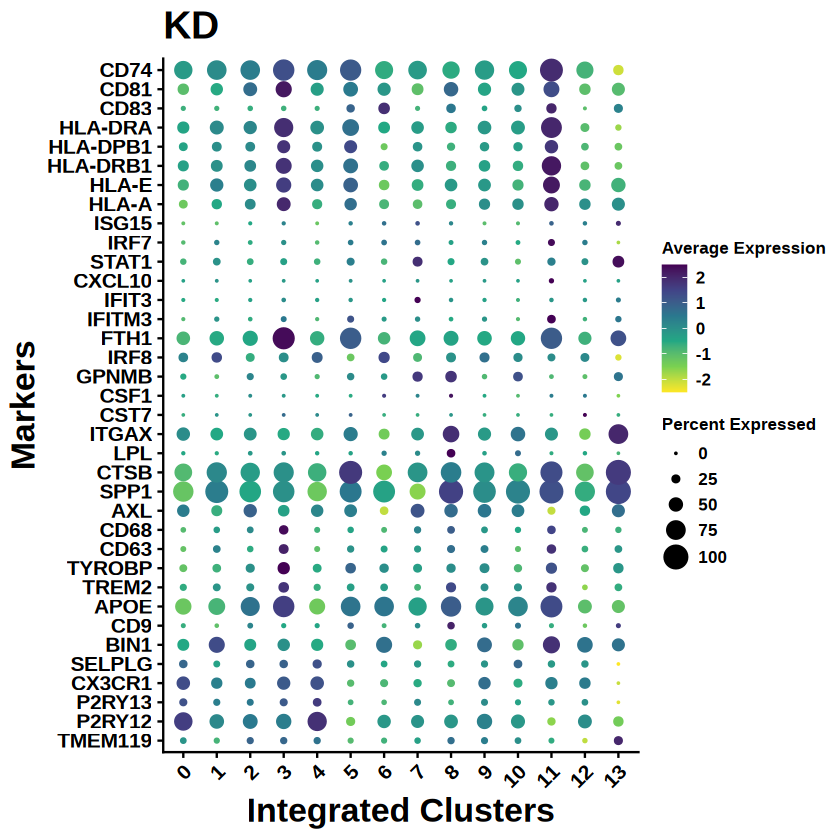

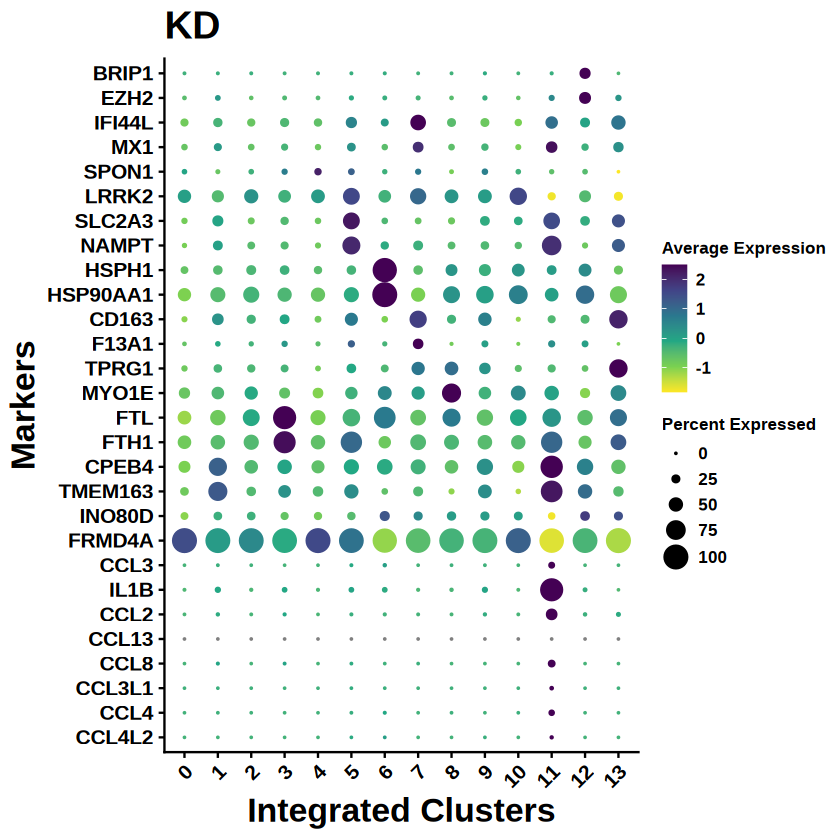

In [36]:
all_gene_list2 <- c("TMEM119","P2RY12","P2RY13","CX3CR1","SELPLG","BIN1",
"CD9", "APOE", "TREM2","TYROBP","CD63","CD68","AXL",
"SPP1","CTSB","LPL", "ITGAX", "CST7", "CSF1", "GPNMB","IRF8","FTH1",
"IFITM3","IFIT3","CXCL10","STAT1","IRF7","ISG15",
"HLA-A","HLA-E","HLA-DRB1", "HLA-DPB1","HLA-DRA","CD83","CD81","CD74")


p <- DotPlot(n2_subset, features = all_gene_list2 , assay = "SCT",
cluster.idents = F, group.by = "cca_cluster")  + RotatedAxis() + 
        scale_color_viridis_c(direction = -1) + coord_flip()
p <- p + theme(text = element_text(size = 20, face = "bold")) +
    ylab("Integrated Clusters") +
    xlab("Markers") +
    theme(axis.text.x = element_text(angle = 45, hjust = 1)) +
    theme(
        legend.title = element_text(size = 10),
        legend.text = element_text(size = 10)
   )+ggtitle("KD")
p$data$id <- factor(p$data$id, levels = 0:99)

#p<- p+NoLegend()

p
ggsave(plot = p, "KD_standared_each_colonna_gene_dotplot_marker.pdf", height = 8, width = 6, bg = "white")

###################################################
all_gene_list2 <- c("CCL4L2","CCL4","CCL3L1", "CCL8" ,"CCL13",
 "CCL2", "IL1B", "CCL3","FRMD4A", "INO80D","TMEM163","CPEB4",
"FTH1","FTL","MYO1E",
#"PTPRG",
"TPRG1",
"F13A1","CD163","HSP90AA1","HSPH1","NAMPT",
"SLC2A3","LRRK2","SPON1","MX1","IFI44L","EZH2","BRIP1")


p <- DotPlot(n2_subset, features = all_gene_list2 , assay = "SCT",
cluster.idents = F, group.by = "cca_cluster")  + RotatedAxis() + 
        scale_color_viridis_c(direction = -1) + coord_flip()
p <- p + theme(text = element_text(size = 20, face = "bold")) +
    ylab("Integrated Clusters") +
    xlab("Markers") +
    theme(axis.text.x = element_text(angle = 45, hjust = 1)) +
    theme(
        legend.title = element_text(size = 10),
        legend.text = element_text(size = 10)
    )+ggtitle("KD")
p$data$id <- factor(p$data$id, levels = 0:99)

#p<- p+NoLegend()

p
ggsave(plot = p, "KD_standared_each_ROSMAP_gene_dotplot_marker.pdf", height = 7, width = 6, bg = "white")

MD

Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.
Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.


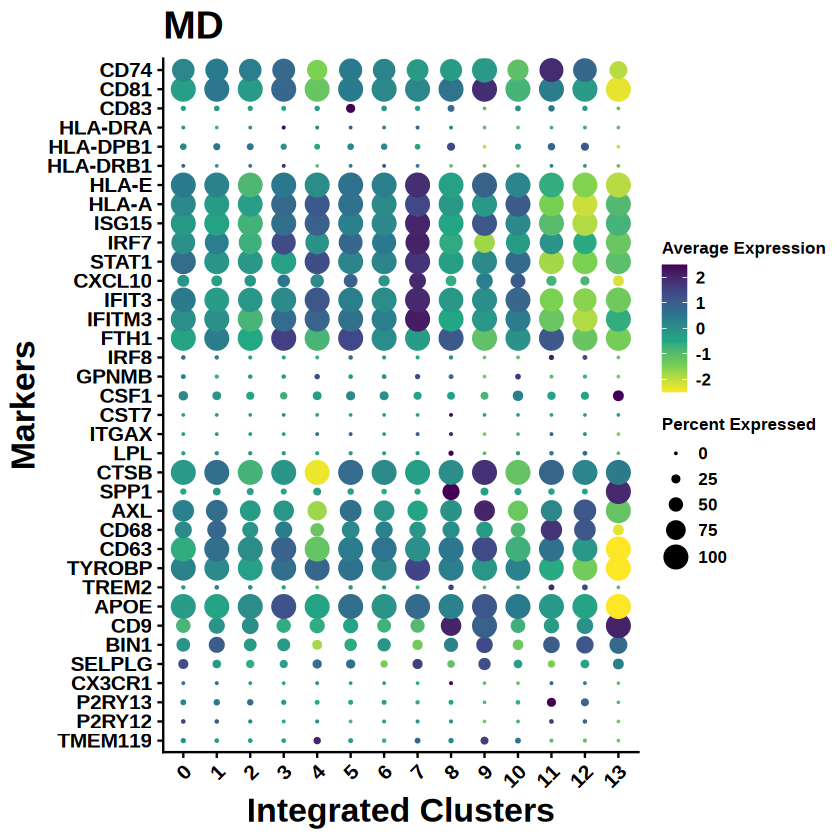

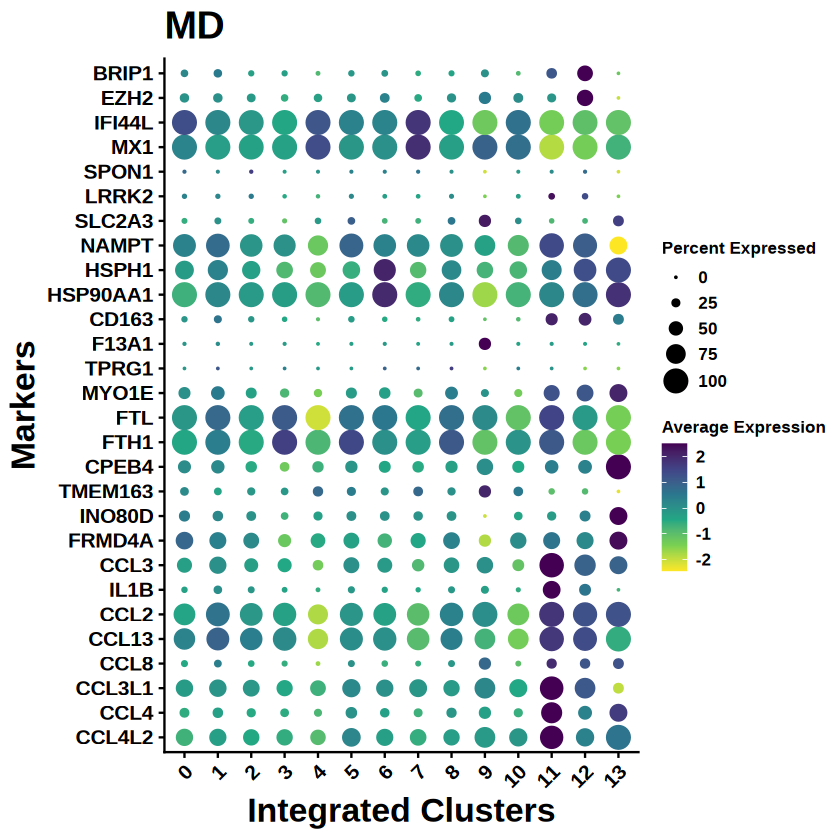

In [37]:
all_gene_list2 <- c("TMEM119","P2RY12","P2RY13","CX3CR1","SELPLG","BIN1",
"CD9", "APOE", "TREM2","TYROBP","CD63","CD68","AXL",
"SPP1","CTSB","LPL", "ITGAX", "CST7", "CSF1", "GPNMB","IRF8","FTH1",
"IFITM3","IFIT3","CXCL10","STAT1","IRF7","ISG15",
"HLA-A","HLA-E","HLA-DRB1", "HLA-DPB1","HLA-DRA","CD83","CD81","CD74")


p <- DotPlot(n3_subset, features = all_gene_list2 , assay = "SCT",
cluster.idents = F, group.by = "cca_cluster")  + RotatedAxis() + 
        scale_color_viridis_c(direction = -1) + coord_flip()
p <- p + theme(text = element_text(size = 20, face = "bold")) +
    ylab("Integrated Clusters") +
    xlab("Markers") +
    theme(axis.text.x = element_text(angle = 45, hjust = 1)) +
    theme(
        legend.title = element_text(size = 10),
        legend.text = element_text(size = 10)
   )+ggtitle("MD")
p$data$id <- factor(p$data$id, levels = 0:99)

#p<- p+NoLegend()

p
ggsave(plot = p, "MD_standared_each_colonna_gene_dotplot_marker.pdf", height = 9, width = 6, bg = "white")

###################################################

all_gene_list2 <- c("CCL4L2","CCL4","CCL3L1", "CCL8" ,"CCL13",
 "CCL2", "IL1B", "CCL3","FRMD4A", "INO80D","TMEM163","CPEB4",
"FTH1","FTL","MYO1E",
#"PTPRG",
"TPRG1",
"F13A1","CD163","HSP90AA1","HSPH1","NAMPT",
"SLC2A3","LRRK2","SPON1","MX1","IFI44L","EZH2","BRIP1")


p <- DotPlot(n3_subset, features = all_gene_list2 , assay = "SCT",
cluster.idents = F, group.by = "cca_cluster")  + RotatedAxis() + 
        scale_color_viridis_c(direction = -1) + coord_flip()
p <- p + theme(text = element_text(size = 20, face = "bold")) +
    ylab("Integrated Clusters") +
    xlab("Markers") +
    theme(axis.text.x = element_text(angle = 45, hjust = 1)) +
    theme(
        legend.title = element_text(size = 10),
        legend.text = element_text(size = 10)
    )+ggtitle("MD")
p$data$id <- factor(p$data$id, levels = 0:99)

#p<- p+NoLegend()

p
ggsave(plot = p, "MD_standared_each_ROSMAP_gene_dotplot_marker.pdf", height = 7, width = 6, bg = "white")

ROSMAP

Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.
Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.


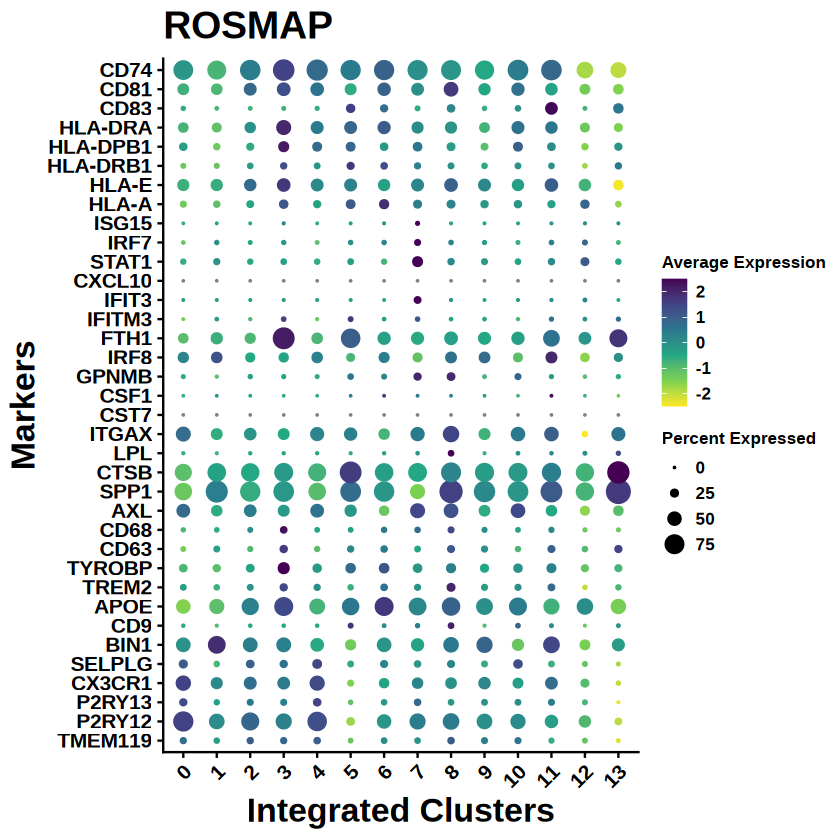

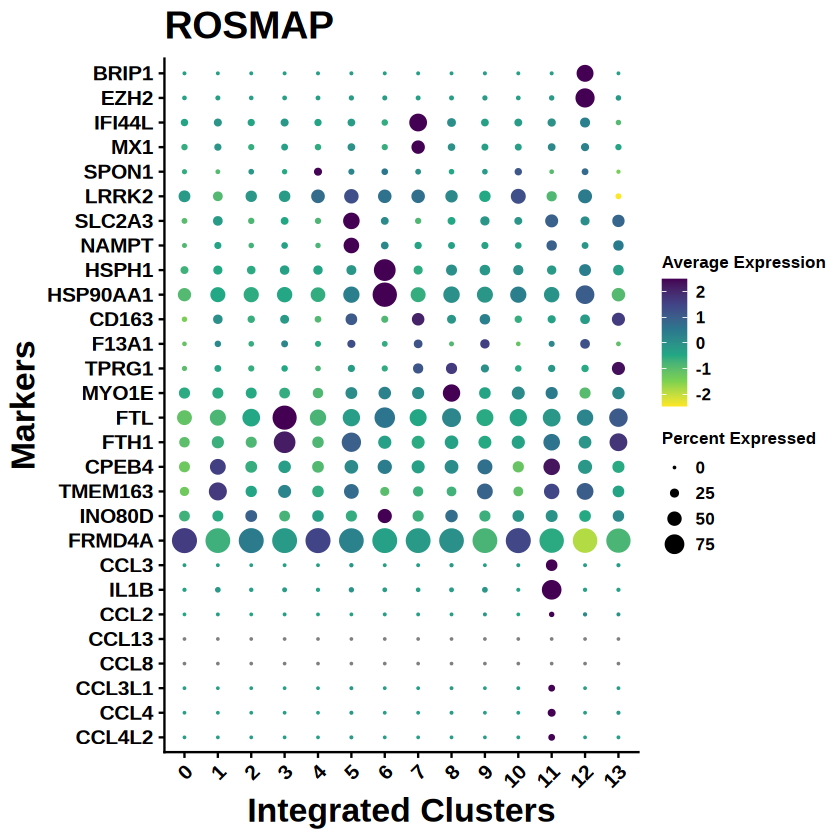

In [38]:
all_gene_list2 <- c("TMEM119","P2RY12","P2RY13","CX3CR1","SELPLG","BIN1",
"CD9", "APOE", "TREM2","TYROBP","CD63","CD68","AXL",
"SPP1","CTSB","LPL", "ITGAX", "CST7", "CSF1", "GPNMB","IRF8","FTH1",
"IFITM3","IFIT3","CXCL10","STAT1","IRF7","ISG15",
"HLA-A","HLA-E","HLA-DRB1", "HLA-DPB1","HLA-DRA","CD83","CD81","CD74")


p <- DotPlot(n4_subset, features = all_gene_list2 , assay = "SCT",
cluster.idents = F, group.by = "cca_cluster")  + RotatedAxis() + 
        scale_color_viridis_c(direction = -1) + coord_flip()
p <- p + theme(text = element_text(size = 20, face = "bold")) +
    ylab("Integrated Clusters") +
    xlab("Markers") +
    theme(axis.text.x = element_text(angle = 45, hjust = 1)) +
    theme(
        legend.title = element_text(size = 10),
        legend.text = element_text(size = 10)
   )+ggtitle("ROSMAP")
p$data$id <- factor(p$data$id, levels = 0:99)

#p<- p+NoLegend()

p
ggsave(plot = p, "ROSMAP_standared_each_colonna_gene_dotplot_marker.pdf", height = 8, width = 6, bg = "white")

###################################################

all_gene_list2 <- c("CCL4L2","CCL4","CCL3L1", "CCL8" ,"CCL13",
 "CCL2", "IL1B", "CCL3","FRMD4A", "INO80D","TMEM163","CPEB4",
"FTH1","FTL","MYO1E",
#"PTPRG",
"TPRG1",
"F13A1","CD163","HSP90AA1","HSPH1","NAMPT",
"SLC2A3","LRRK2","SPON1","MX1","IFI44L","EZH2","BRIP1")

p <- DotPlot(n4_subset, features = all_gene_list2 , assay = "SCT",
cluster.idents = F, group.by = "cca_cluster")  + RotatedAxis() + 
        scale_color_viridis_c(direction = -1) + coord_flip()
p <- p + theme(text = element_text(size = 20, face = "bold")) +
    ylab("Integrated Clusters") +
    xlab("Markers") +
    theme(axis.text.x = element_text(angle = 45, hjust = 1)) +
    theme(
        legend.title = element_text(size = 10),
        legend.text = element_text(size = 10)
    )+ggtitle("ROSMAP")
p$data$id <- factor(p$data$id, levels = 0:99)

#p<- p+NoLegend()

p
ggsave(plot = p, "ROSMAP_standared_each_ROSMAP_gene_dotplot_marker.pdf", height = 7, width = 6, bg = "white")

tables

In [2]:
# analysis of integrated object
sobj_new <- qread("/home/a.garg/integration_project/step_10/ROSMAP_edited_cell_type/Allfour_SCT_integration_layer_wdedited_meta.qs", nthreads = 6)

In [3]:
# subset
n1_subset <- subset(sobj_new, subset = batch =="BJ" )
n2_subset <- subset(sobj_new, subset = batch =="KD" )
n3_subset <- subset(sobj_new, subset = batch =="MD" )
n4_subset <- subset(sobj_new, subset = batch =="ROSMAP_MIT")

In [4]:
pheno = read.csv('/home/a.garg/integration_project/step_17/Brain_pheno_jorge.csv',head=T)


n2_subset@meta.data = merge(n2_subset@meta.data,pheno[,c('Sample','TREM2_type','Final_Status','SEX','APOE','rs1582763')],by.x='Sample.ID',by.y='Sample')
rownames(n2_subset@meta.data) = n2_subset$barcode

n2_subset$TREM2_type = as.character(n2_subset$TREM2_type)

n2_subset$TREM2_type[is.na(n2_subset$TREM2_type)] = 'Wild Type'
n2_subset$TREM2_all = n2_subset$TREM2_type
n2_subset$TREM2_all[n2_subset$TREM2_all != 'Wild Type'] = 'TREM2'
n2_subset$TREM2_reduced = n2_subset$TREM2_all
n2_subset$TREM2_reduced[n2_subset$TREM2_type %in% c('R47H','R62H','H157Y')] = 'TREM2 Reduced'
n2_subset$TREM2_reduced[n2_subset$TREM2_reduced != 'TREM2 Reduced'] = 'Other'
n2_subset$SEX = as.character(n2_subset$SEX)
n2_subset$SEX[n2_subset$SEX == 1] = 'Male'
n2_subset$SEX[n2_subset$SEX == 2] = 'Female'
n2_subset$APOE = as.character(n2_subset$APOE)
n2_subset$rs1582763 = factor(n2_subset$rs1582763,levels=c('GG','AG','AA'))
n2_subset$Final_Status = as.character(n2_subset$Final_Status)
n2_subset$Final_Status[n2_subset$Final_Status== 'Neuro_ADAD_noncarrier'] = 'Neuro_CO'
n2_subset$Final_Status[n2_subset$Final_Status== 'Neuro_DLB'] = 'Neuro_OT'

n2_subset$Final_Status[n2_subset$Final_Status== 'Neuro_OT'] = 'OTH'
n2_subset$Final_Status[n2_subset$Final_Status== 'Neuro_AD'] = 'sAD'
n2_subset$Final_Status[n2_subset$Final_Status== 'Neuro_CO'] = 'CO'
n2_subset$Final_Status[n2_subset$Final_Status== 'Neuro_Presyntomatic'] = 'Pres'
n2_subset$Final_Status[n2_subset$Final_Status== 'ADAD'] = 'ADAD'

In [7]:
n1_subset
n2_subset
n3_subset
n4_subset

An object of class Seurat 
64798 features across 25407 samples within 2 assays 
Active assay: SCT (26942 features, 3000 variable features)
 3 layers present: counts, data, scale.data
 1 other assay present: RNA
 4 dimensional reductions calculated: pca, umap.unintegrated, integrated.cca, umap.cca

An object of class Seurat 
64798 features across 15726 samples within 2 assays 
Active assay: SCT (26942 features, 3000 variable features)
 3 layers present: counts, data, scale.data
 1 other assay present: RNA
 4 dimensional reductions calculated: pca, umap.unintegrated, integrated.cca, umap.cca

An object of class Seurat 
64798 features across 15350 samples within 2 assays 
Active assay: SCT (26942 features, 3000 variable features)
 3 layers present: counts, data, scale.data
 1 other assay present: RNA
 4 dimensional reductions calculated: pca, umap.unintegrated, integrated.cca, umap.cca

An object of class Seurat 
64798 features across 166339 samples within 2 assays 
Active assay: SCT (26942 features, 3000 variable features)
 3 layers present: counts, data, scale.data
 1 other assay present: RNA
 4 dimensional reductions calculated: pca, umap.unintegrated, integrated.cca, umap.cca

In [9]:
table(n1_subset$dataset)
table(n1_subset$Sample.ID)


Control  Mutant 
  17769    7638 


 HO1  HO2  WT1  WT2  WT3 
3083 4555 4732 6327 6710 

In [4]:
unique(n2_subset$Sample.ID) %>% length

[1] 57

In [15]:
# count cell 
table(n2_subset$Gender)
table(n2_subset$Final_Status)


   1    2 
7171 8555 


ADAD   CO  OTH Pres  sAD 
3927 2784 2423  544 6048 

In [32]:
table(n2_subset@meta.data$TREM2_type, n2_subset$Final_Status)

            
             ADAD   CO  OTH Pres  sAD
  D87N          0    0    0    0  215
  H157Y         0    0    0    0  274
  L211P_T96K    0    0  162    0   86
  R136W         0    0    0    0  114
  R47H          0    0  438    0  345
  R52H          0    0    0    0  128
  R62H          0    0  292    0 1262
  Wild Type  3927 2784 1531  544 3624

In [23]:
# smaple no in AD
data <- table( n2_subset$Sample.ID,n2_subset$Final_Status) 

count_nonzero <- function(x) {
  sum(x != 0)
}

# Apply the function to each column
apply(data, 2, count_nonzero)

ADAD   CO  OTH Pres  sAD 
  15    7    7    3   25

In [116]:
#AOD mean and sd
data1 <- table(n2_subset@meta.data$AOD, n2_subset$Final_Status)

lapply(1:length(colnames(data1)),function(x){
  mean_val <- mean(rownames(data1[data1[,x]!=0,]) %>% as.numeric())
  sd_val <- sd(rownames(data1[data1[,x]!=0,]) %>% as.numeric())
   return(c(colnames(data1)[x],round(mean_val,2), round(sd_val,2)))
})

[[1]]
[1] "ADAD"  "52.64" "6.8"  

[[2]]
[1] "CO"    "92.14" "8.3"  

[[3]]
[1] "OTH"   "89.86" "5.64" 

[[4]]
[1] "Pres"  "77.33" "15.28"

[[5]]
[1] "sAD"  "81"   "8.84"

In [144]:
# male % in each AD sample
male_data<- n2_subset@meta.data[n2_subset$Gender == 1,]
lapply(1:length(unique(male_data$Final_Status)), function(x) {
male_per <- round(table(male_data$Final_Status)[x]/table(n2_subset$Final_Status)[x] *100,2)
return(male_per)
})


[[1]]
 ADAD 
48.28 

[[2]]
   CO 
40.05 

[[3]]
  OTH 
30.13 

[[4]]
Pres 
30.7 

[[5]]
  sAD 
53.95

In [155]:
#PMI mean and sd
data1 <- table(n2_subset$PMI, n2_subset$Final_Status)

lapply(1:length(colnames(data1)),function(x){
  mean_val <- mean(rownames(data1[data1[,x]!=0,]) %>% as.numeric())
  sd_val <- sd(rownames(data1[data1[,x]!=0,]) %>% as.numeric())
   return(c(colnames(data1)[x],round(mean_val,2), round(sd_val,2)))
})

[[1]]
[1] "ADAD"  "14.73" "8"    

[[2]]
[1] "CO"   "12.3" "5.51"

[[3]]
[1] "OTH"   "13.87" "9.17" 

[[4]]
[1] "Pres"  "12.42" "1.91" 

[[5]]
[1] "sAD"   "11.81" "7.4"

In [13]:
table(n2_subset@meta.data$TREM2_type, n2_subset$ADAD)

            
             ADAD   CA   CO  OTH
  D87N          0  215    0    0
  H157Y         0  274    0    0
  L211P_T96K    0   86    0  162
  R136W         0  114    0    0
  R47H          0  783    0    0
  R52H          0  128    0    0
  R62H          0 1262    0  292
  Wild Type  3927 4168 2784 1531

ROSMAP study

In [6]:
table(n4_subset$seurat_clusters)


    0     1     2     3     4     5     6     7     8     9    10    11    12 
35489 27052 19163 12445 17395 12097 11101  8567  8294  5148  4477  2362  1294 
   13 
 1455 

In [113]:
table(n4_subset$msex)
table(n4_subset$ADdiag3types)
table(n4_subset@meta.data$brainRegion)


Female   Male 
 86111  80228 


earlyAD  lateAD   nonAD 
  47787   28626   89926 


     AngularGyrus  EntorhinalCortex       Hippocampus MidtemporalCortex 
             8236             22686             27390             11034 
              PFC          Thalamus 
            73595             23398 

In [117]:
#AOD mean and sd
data1 <- table(n4_subset$age_death, n4_subset$ADdiag3types)

lapply(1:length(colnames(data1)),function(x){
  mean_val <- mean(rownames(data1[data1[,x]!=0,]) %>% as.numeric())
  sd_val <- sd(rownames(data1[data1[,x]!=0,]) %>% as.numeric())
   return(c(colnames(data1)[x],round(mean_val,2), round(sd_val,2)))
})

[[1]]
[1] "earlyAD" "87.57"   "8.35"   

[[2]]
[1] "lateAD" "87.86"  "7.61"  

[[3]]
[1] "nonAD" "88.2"  "10.67"

In [118]:
# number of Samples
# smaple no in AD
data <- table( n4_subset$Sample.ID, n4_subset$ADdiag3types)

count_nonzero <- function(x) {
  sum(x != 0)
}

# Apply the function to each column
apply(data, 2, count_nonzero)

earlyAD  lateAD   nonAD 
    133      74     220

In [152]:
# male % in each AD sample
male_data<- n4_subset@meta.data[n4_subset$msex =="Male",]
lapply(1:length(unique(male_data$ADdiag3types)), function(x) {
male_per <- round(table(male_data$ADdiag3types)[x]/table(n4_subset$ADdiag3types)[x] *100,2)
return(male_per)
})


[[1]]
earlyAD 
  50.03 

[[2]]
lateAD 
 34.28 

[[3]]
nonAD 
51.72

In [154]:
#PMI mean and sd
data1 <- table(n4_subset$pmi, n4_subset$ADdiag3types)

lapply(1:length(colnames(data1)),function(x){
  mean_val <- mean(rownames(data1[data1[,x]!=0,]) %>% as.numeric())
  sd_val <- sd(rownames(data1[data1[,x]!=0,]) %>% as.numeric())
   return(c(colnames(data1)[x],round(mean_val,2), round(sd_val,2)))
})

[[1]]
[1] "earlyAD" "12.96"   "9.4"    

[[2]]
[1] "lateAD" "9.25"   "5.98"  

[[3]]
[1] "nonAD" "15.33" "16.52"

In [157]:
colnames(n4_subset@meta.data)

[1] "orig.ident"            "nCount_RNA"            "nFeature_RNA"         
 [4] "dataset"               "Sample.ID"             "batch"                
 [7] "Cell_type"             "RNA_snn_res.1"         "seurat_clusters"      
[10] "percent.rbs"           "Gender"                "PMI"                  
[13] "AOD"                   "Status"                "nAPOE"                
[16] "ADAD"                  "clusters_data"         "brainRegion"          
[19] "age_death"             "msex"                  "pmi"                  
[22] "ADdiag3types"          "nCount_SCT"            "nFeature_SCT"         
[25] "unintegrated_clusters" "barcode"               "cca_cluster"          
[28] "percent.mt"            "percent.ribo"

In [170]:
table(n2_subset@meta.data$APOE, n2_subset$Final_Status)

    
     ADAD   CO  OTH Pres  sAD
  23  117    0  162    0    0
  24    0    0    0    0  469
  33 2642 2526 1823  377 2914
  34  659  258  438  167 2541
  44  509    0    0    0  124

Taking whole ROSMAP data to check if there is any removing cluster having isssue with new annotation

In [7]:
count <- readRDS("~/integration_project/step_1/ROSMAP.ImmuneCells.6regions.snRNAseq.counts.rds")
meta.data <- readRDS("~/integration_project/step_1/ROSMAP.ImmuneCells.6regions.snRNAseq.meta.rds")

In [14]:
ROSMAP_MIT <- CreateSeuratObject(counts = count, meta.data = meta.data)
Idents(ROSMAP_MIT) <- "seurat_clusters"

In [23]:
table(ROSMAP_MIT$seurat_clusters)


    0     1     2     3     4     5     6     7     8     9    10    11    12 
43045 29575 29140 14850 14504 11414  8071  4732  4643  4422  2230  2136  1999 
   13    14    15 
 1943  1290   426 

In [15]:
ROSMAP_art_marker  <- read_excel("~/integration_project/step_1/SupplementalTables.combined.xlsx", sheet = 3)
gene_list <- lapply(unique(ROSMAP_art_marker$microgliaState), function(x){
  
gene <- ROSMAP_art_marker$gene[ROSMAP_art_marker$microgliaState == x]
return(gene)
})

names(gene_list) <- c("Homeostatic","Neuronal_Surveillance",
                      "Inflammatory_I","Ribosome_Biogenesis","Lipid_Processing",
                      "Phagocytic","Stress_Signature","Glycolytic",
                      "Inflammatory_II","Inflammatory_III","Antiviral","Cycling")

In [18]:
ROSMAP_MIT <- SCTransform(ROSMAP_MIT)

Running SCTransform on assay: RNA



Running SCTransform on layer: counts

vst.flavor='v2' set. Using model with fixed slope and excluding poisson genes.

`vst.flavor` is set to 'v2' but could not find glmGamPoi installed.
Please install the glmGamPoi package for much faster estimation.
--------------------------------------------
install.packages('BiocManager')
BiocManager::install('glmGamPoi')
--------------------------------------------
Falling back to native (slower) implementation.


Variance stabilizing transformation of count matrix of size 16206 by 174420

Model formula is y ~ log_umi

Get Negative Binomial regression parameters per gene

Using 2000 genes, 5000 cells

Warning message in theta.ml(Y, mu, sum(w), w, limit = control$maxit, trace = control$trace > :
“iteration limit reached”
Warning message in theta.ml(Y, mu, sum(w), w, limit = control$maxit, trace = control$trace > :
“iteration limit reached”
Warning message in theta.ml(Y, mu, sum(w), w, limit = control$maxit, trace = control$trace > :
“iteration limi

In [19]:
gene_list2<- names(gene_list)

In [20]:
# Genescore - ROSMAP markers analysis with Seurat
ROSMAP_MIT= AddModuleScore(ROSMAP_MIT,gene_list)
sobj_new_cols <- colnames(ROSMAP_MIT@meta.data)

sobj_new_cols[grep("Cluster[0-9]+$", sobj_new_cols)] <- names(gene_list)
colnames(ROSMAP_MIT@meta.data) <- sobj_new_cols

Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.


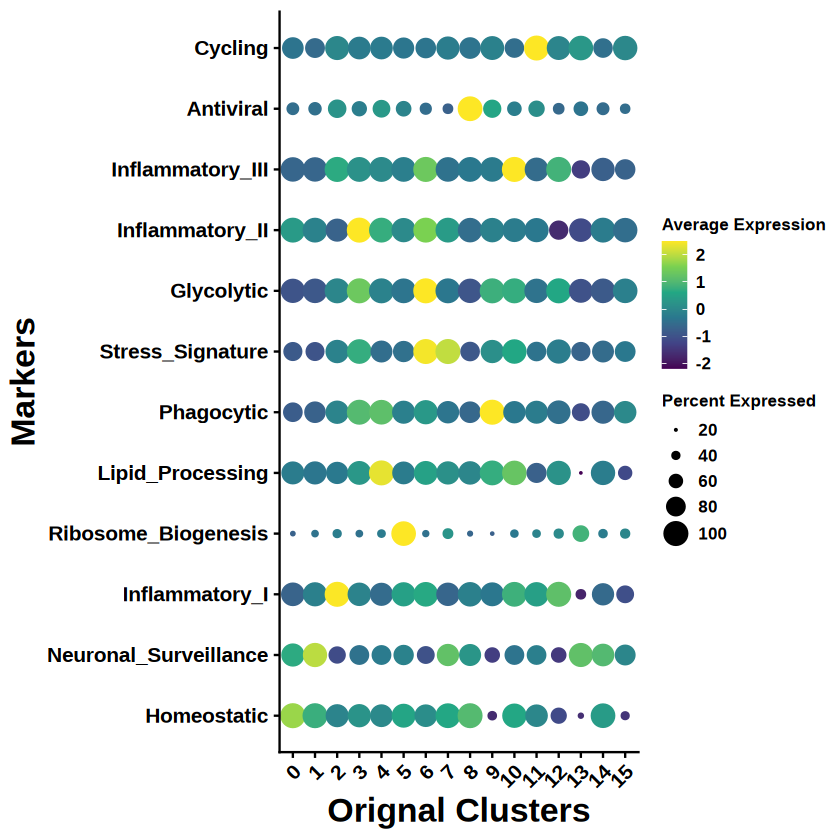

In [22]:
p <- DotPlot(ROSMAP_MIT, features = , gene_list2 , assay = "RNA",
        cluster.idents = F, group.by ="seurat_clusters")  + RotatedAxis() + scale_color_viridis_c(direction = 1) + coord_flip()
p <- p + theme(text = element_text(size = 20, face = "bold")) +
    ylab("Orignal Clusters") +
    xlab("Markers") +
    theme(axis.text.x = element_text(angle = 45, hjust = 1)) +
    theme(
        legend.title = element_text(size = 10),
        legend.text = element_text(size = 10)
    )
#p$data$id <- factor(p$data$id, levels = 0:99)

p

We observed the same pattarn

In [9]:
table(meta.data$seurat_clusters)


    0     1     2     3     4     5     6     7     8     9    10    11    12 
43045 29575 29140 14850 14504 11414  8071  4732  4643  4422  2230  2136  1999 
   13    14    15 
 1943  1290   426 

In [11]:
ROSMAP_MIT_micro_SCT<- qread("~/integration_project/step_1/ROSMAP_MIT_micro_SCT.qs", nthreads = 6)

In [13]:
table(ROSMAP_MIT_micro_SCT$seurat_clusters)


    0     1     2     3     4     5     6     7     8     9    10    11    12 
43045 29575 29140 14850 14504 11414  8071  4732  4643     0  2230  2136  1999 
   13    14    15 
    0     0     0 